## Time Series Analysis and Forecasting

Which of the following do you think is an example of time series?

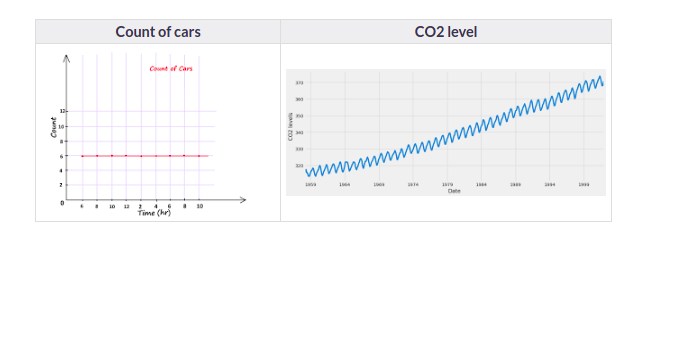

In [2]:
from IPython.display import Image
Image('t1.png')

Time Series is generally data that is collected over time and is dependent on it. Here we see that the count of cars is independent of time, hence it is not a time series. While the CO2 level increases with respect to time, hence it is a time series.

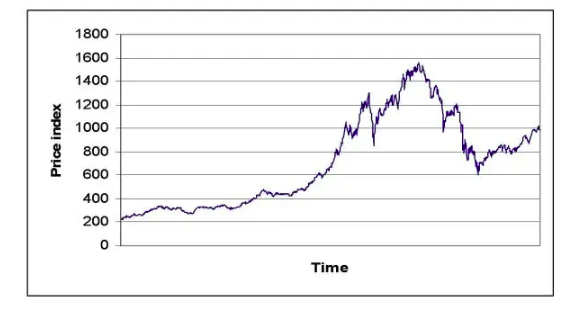

In [3]:
from IPython.display import Image
Image('t2.png')

<b>Passenger Count of Airlines</b>

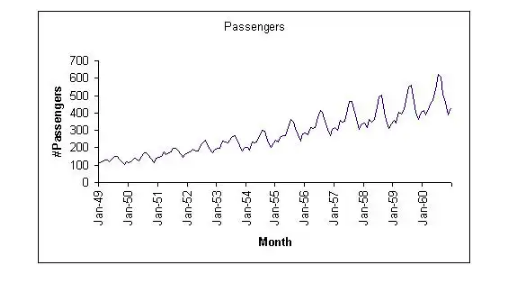

In [4]:
from IPython.display import Image
Image('t3.png')

<b>Temperature Over Time</b>

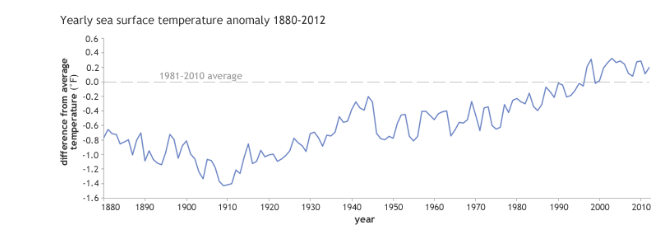

In [5]:
from IPython.display import Image
Image('t4.png')

<b>A Number of Visitors in a Hotel</b>

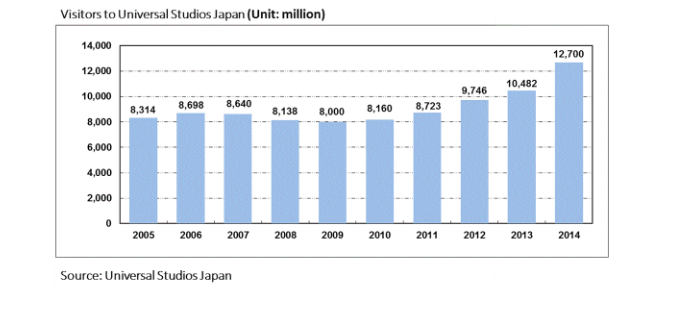

In [6]:
from IPython.display import Image
Image('t5.png')

<b>Components of a Time Series Forecasting in Python</b>

1. Trend: A trend is a general direction in which something is developing or changing. So we see an increasing trend in this time series. We can see that the passenger count is increasing with the number of years. 

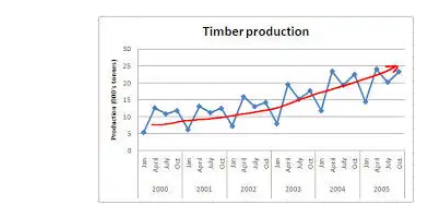

In [7]:
from IPython.display import Image
Image('t6.png')

2. Seasonality:–  Another clear pattern can also be seen in the above time series, i.e., the pattern is repeating at a regular time interval which is known as the seasonality. Any predictable change or pattern in a time series that recurs or repeats over a specific time period can be said to be seasonality. 

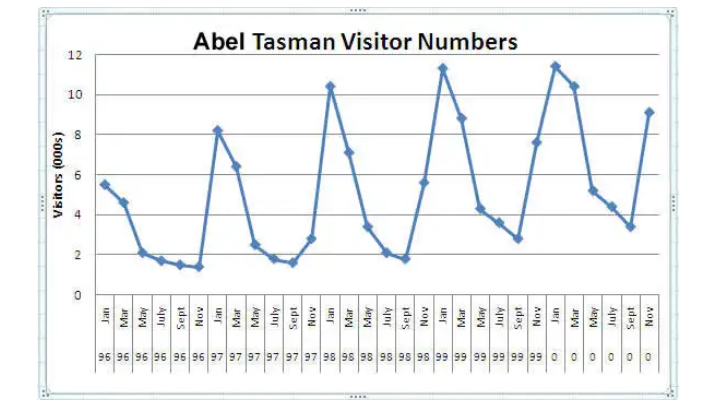

In [8]:
from IPython.display import Image
Image('t7.png')

Unicorn Investors wants to make an investment in a new form of transportation – JetRail. JetRail uses Jet propulsion technology to run rails and move people at a high speed! The investment would only make sense if they can get more than 1 Million monthly users within the next 18 months. In order to help Unicorn Ventures in their decision, you need to forecast the traffic on JetRail for the next 7 months. You are provided with traffic data of JetRail since inception in the test file.

1) Hypothesis Generation
Hypothesis generation helps us to point out the factors which might affect our dependent variable. Below are some of the hypotheses which I think can affect the passenger count(dependent variable for this time series problem) on the JetRail:

<b>There will be an increase in traffic as the years pass by.</b>

Explanation – Population has a general upward trend with time, so I can expect more people to travel by JetRail. Also, generally, companies expand their businesses over time leading to more customers traveling through JetRail.

<b>The Traffic will be High from May to October</b>

Explanation – Tourist visits generally increase during this time period.

<b>Traffic on Weekdays will be More as Compared to Weekends/Holidays.</b>

Explanation – People will go to the office on weekdays and hence the traffic will be more

<b>Traffic during the Peak Hours will be High.</b>

Explanation – People will travel to work and college.

We will try to validate each of these hypothesis based on the dataset. Now let’s have a look at the dataset.

After making our hypothesis, we will try to validate them. Before that, we will import all the necessary packages.

In [9]:
import pandas as pd 
import numpy as np          # For mathematical calculations 
import matplotlib.pyplot as plt  # For plotting graphs 
from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series 
%matplotlib inline 
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")

In [10]:
train=pd.read_csv('train.csv')
train.head()

ID          Datetime  Count
0   0  25-08-2012 00:00      8
1   1  25-08-2012 01:00      2
2   2  25-08-2012 02:00      6
3   3  25-08-2012 03:00      2
4   4  25-08-2012 04:00      2

In [11]:
test=pd.read_csv('test.csv')
test.head()

ID          Datetime
0  18288  26-09-2014 00:00
1  18289  26-09-2014 01:00
2  18290  26-09-2014 02:00
3  18291  26-09-2014 03:00
4  18292  26-09-2014 04:00

In [12]:
#Let’s make a copy of the train and test data so that even if we do changes in these datasets we do not lose the original dataset.
train_original=train.copy()
test_original=test.copy()

<b>Dataset Structure and Content</b>

In [13]:
train.columns, test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

We have ID, Datetime, and the corresponding count of passengers in the training file. For the test file we have ID and Datetime only so we have to predict the Count for the test file.

Let’s understand each feature first:

ID is the unique number given to each observation point.

Datetime is the time of each observation.

The count is the passenger count corresponding to each Datetime.

In [14]:
train.dtypes, test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object,
 ID           int64
 Datetime    object
 dtype: object)

ID and Count are in integer format while the Datetime is in object format for the training file.
ID is in integer and Datetime is in object format for the test file.

In [15]:
train.shape, test.shape

((18288, 3), (5112, 2))

Feature Extraction

We will extract the time and date from the Datetime. We have seen earlier that the data type of Datetime is an object. So first of all we have to change the data type to DateTime format otherwise we can not extract features from it.

In [16]:
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
test['Datetime'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test_original['Datetime'] = pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M') 
train_original['Datetime'] = pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M')

We made some hypothesis for the effect of the hour, day, month, and year on the passenger count. So, let’s extract the year, month, day, and hour from the Datetime to validate our hypothesis.

In [17]:
for i in (train, test, test_original, train_original):
    i['year']=i.Datetime.dt.year 
    i['month']=i.Datetime.dt.month 
    i['day']=i.Datetime.dt.day    
    i['Hour']=i.Datetime.dt.hour

We made a hypothesis for the traffic pattern on weekdays and weekends as well. So, let’s make a weekend variable to visualize the impact of weekends on traffic.

We will first extract the day of the week from Datetime and then based on the values we will assign whether the day is a weekend or not.

Values of 5 and 6 represents that the days are weekend.

train[‘day of week’]=train[‘Datetime’].dt.dayofweek

temp = train[‘Datetime’]

Let’s assign 1 if the day of the week is a weekend and 0 if the day of the week in not a weekend.

In [18]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0
temp2 = train['Datetime'].apply(applyer) 
train['weekend']=temp2

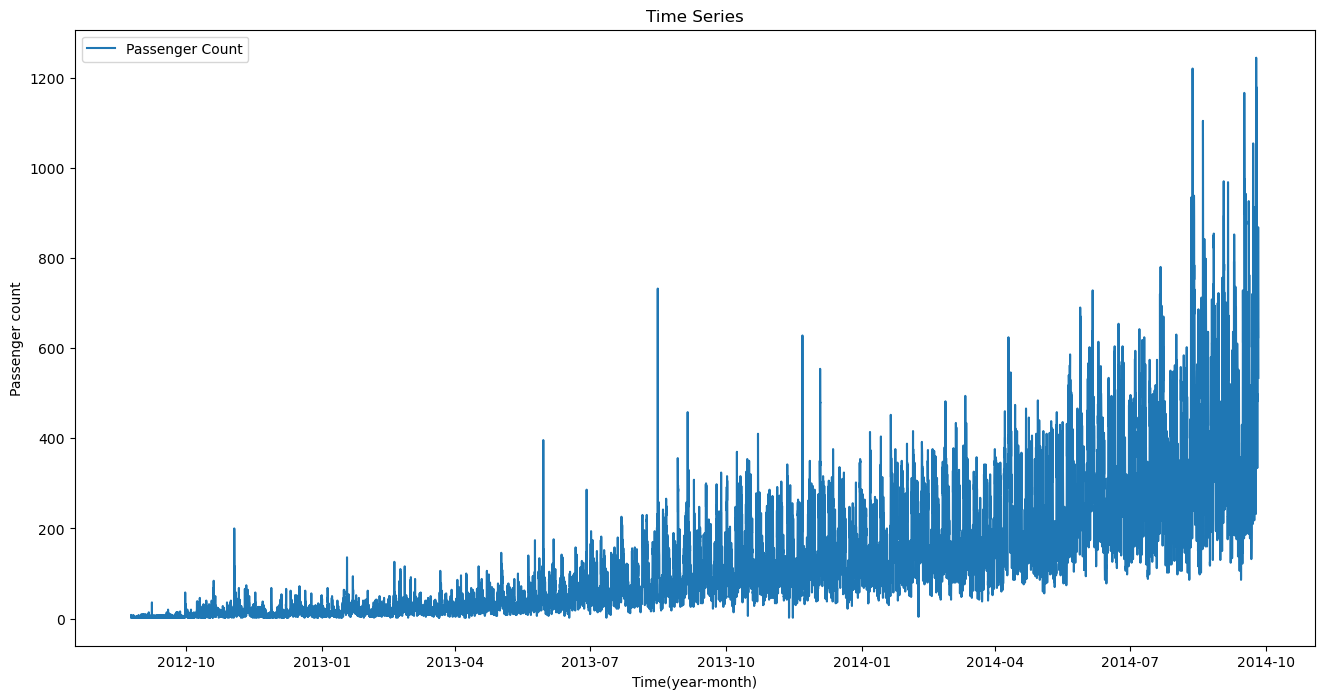

In [19]:
#Let’s look at the time series.
train.index = train['Datetime'] 
df=train.drop('ID',1) 
ts = df['Count'] 
plt.figure(figsize=(16,8)) 
plt.plot(ts, label='Passenger Count') 
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("Passenger count") 
plt.legend(loc='best')

Here we can infer that there is an increasing trend in the series, i.e., the number of counts is increasing with respect to time. We can also see that at certain points there is a sudden increase in the number of counts. The possible reason behind this could be that on a particular day, due to some event the traffic was high.

We will work on the training file for all the analysis and will use the test file for forecasting.

Let’s recall the hypothesis that we made earlier:

Traffic will increase as the years pass by

Traffic will be high from May to October

Traffic on weekdays will be more

Traffic during the peak hours will be high

After looking at the dataset, we will now try to validate our hypothesis and make other inferences from the dataset.

<b>Exploratory Analysis</b>
Let us try to verify our hypothesis using the actual data.

Our first hypothesis was traffic will increase as the years pass by. So let’s look at the yearly passenger count.

<AxesSubplot:xlabel='year'>

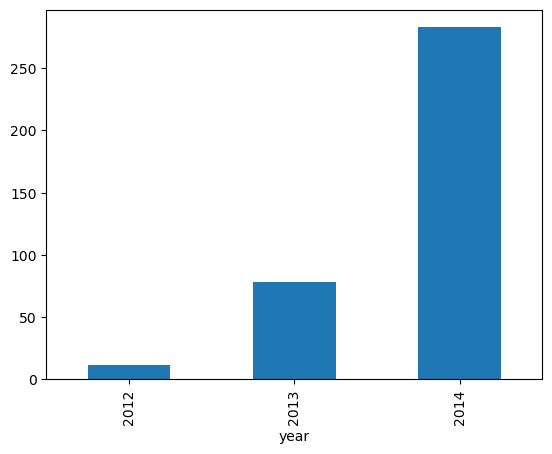

In [20]:
train.groupby('year')['Count'].mean().plot.bar()

We see an exponential growth in the traffic with respect to year which validates our hypothesis.

Our second hypothesis was about the increase in traffic from May to October. So, let’s see the relation between count and month.

<AxesSubplot:xlabel='month'>

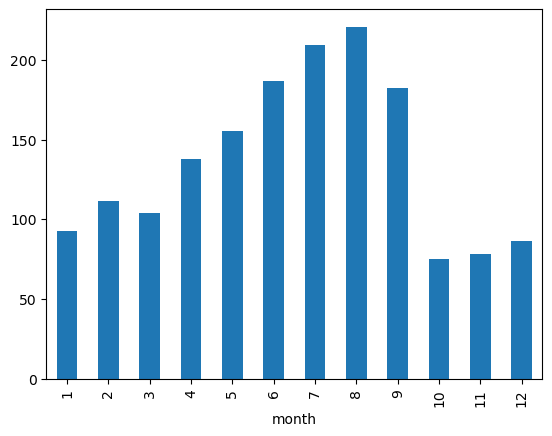

In [21]:
train.groupby('month')['Count'].mean().plot.bar()

Here we see a decrease in the mean passenger count in the last three months. This does not look right. Let’s look at the monthly mean of each year separately.

<AxesSubplot:title={'center':'Passenger Count(Monthwise)'}, xlabel='year,month'>

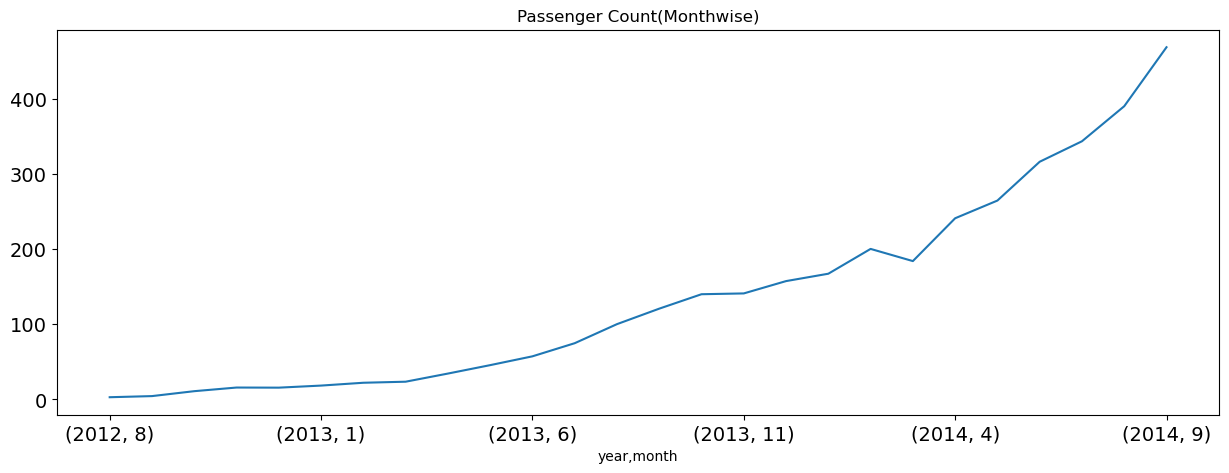

In [22]:
temp=train.groupby(['year', 'month'])['Count'].mean() 
temp.plot(figsize=(15,5), title= 'Passenger Count(Monthwise)', fontsize=14)


We see that the months 10, 11, and 12 are not present for the year 2014 and the mean value for these months in the year 2012 is significantly less.

Since there is an increasing trend in our time series, the mean value for the rest of the months will be more because of their larger passenger counts in the year 2014 and we will get a smaller value for these 3 months.

In the above line plot, we can see an increasing trend in monthly passenger count and the growth is approximately exponential.

Let’s look at the daily mean of passenger count.

<AxesSubplot:xlabel='day'>

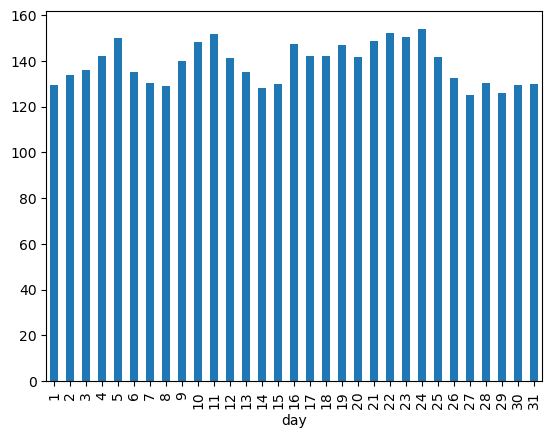

In [23]:
train.groupby('day')['Count'].mean().plot.bar()


We are not getting many insights from the day-wise count of the passengers.  We also made a hypothesis that the traffic will be more during peak hours. So let’s see the mean hourly passenger count.

<AxesSubplot:xlabel='Hour'>

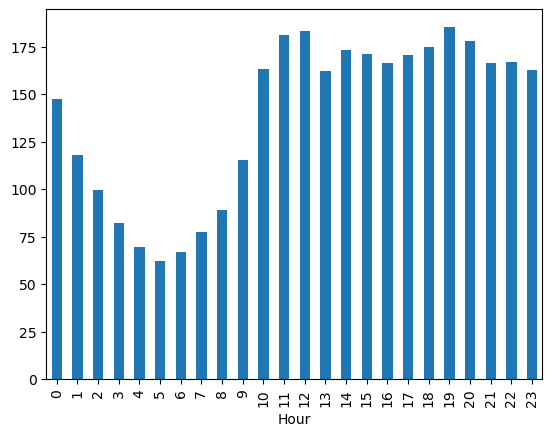

In [24]:
train.groupby('Hour')['Count'].mean().plot.bar()

It can be inferred that the peak traffic is at 7 PM and then we see a decreasing trend till 5 AM.

After that, the passenger count starts increasing again and peaks again between 11 AM and 12 Noon.

Let’s try to validate our hypothesis in which we assumed that the traffic will be more on weekdays.

<AxesSubplot:xlabel='weekend'>

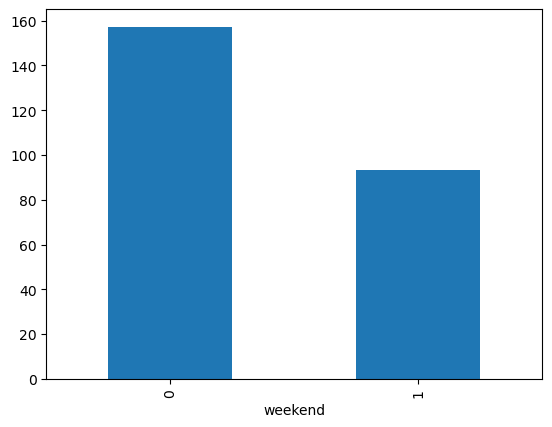

In [25]:
train.groupby('weekend')['Count'].mean().plot.bar()

It can be inferred from the above plot that the traffic is more on weekdays as compared to weekends which validates our hypothesis.

Now we will try to look at the day-wise passenger count.

Note:-  0 is the starting of the week, i.e., 0 is Monday and 6 is Sunday.

<AxesSubplot:xlabel='day of week'>

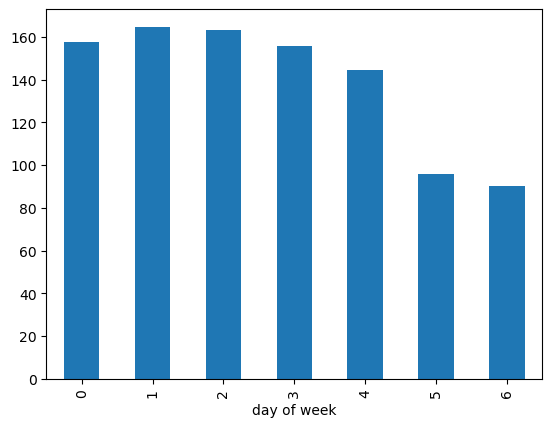

In [26]:
train['day of week']=train['Datetime'].dt.dayofweek
train.groupby('day of week')['Count'].mean().plot.bar()

From the above bar plot, we can infer that the passenger count is less for Saturday and Sunday as compared to the other days of the week. Now we will look at basic modeling techniques. Before that, we will drop the ID variable as it has nothing to do with the passenger count.

In [27]:
train=train.drop('ID',1)

As we have seen that there is a lot of noise in the hourly time series, we will aggregate the hourly time series into daily, weekly, and monthly time series to reduce the noise and make it more stable and hence would be easier for a model to learn.

In [28]:
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 
hourly = train.resample('H').mean() 
daily = train.resample('D').mean() 
weekly = train.resample('W').mean() 
monthly = train.resample('M').mean()

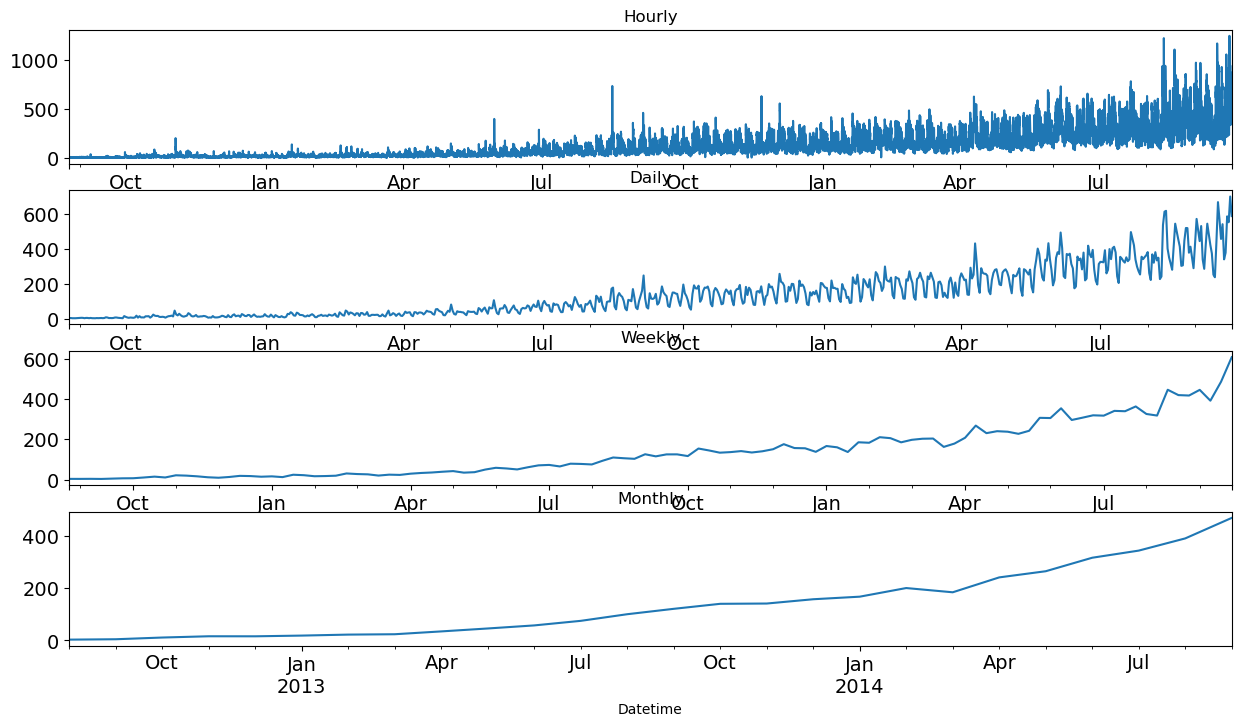

In [29]:
#Let’s look at the hourly, daily, weekly, and monthly time series.
fig, axs = plt.subplots(4,1) 
hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0])
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1])
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2]) 
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3]) 
plt.show()

But it would be difficult to convert the monthly and weekly predictions to hourly predictions, as first we have to convert the monthly predictions to weekly, weekly to daily, and daily to hourly predictions, which will become a very expanded process. So, we will work on the daily time series.

In [30]:
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp 
test = test.resample('D').mean() 
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
train.index = train.Timestamp  
train = train.resample('D').mean()

## Modeling Techniques and Evaluation

As we have validated all our hypothesis, let’s go ahead and build models for Time Series Forecasting. But before we do that, we will need a dataset(validation) to check the performance and generalization ability of our model. Below are some of the properties of the dataset required for the purpose Time Series Forecasting.

The dataset should have the true values of the dependent variable against which the predictions can be checked. Therefore, the test dataset cannot be used for this purpose.

The model should not be trained on the validation dataset. Hence, we cannot train the model on the training dataset and validate it as well.

So, for the above two reasons, we generally divide the train dataset into two parts.

One part is used to train the model and the other part is used as the validation dataset.

Now there are multiple ways to divide the training dataset such as Random Division etc.

1) Splitting the data into the training and validation part

Now we will divide our data into train and validation. We will make a model on the train part and predict on the validation part to check the accuracy of our predictions.

NOTE:-  It is always a good practice to create a validation set that can be used to assess our models locally. If the validation metric(rmse) is changing in proportion to the public leaderboard score, this would imply that we have chosen a stable validation technique.

To divide the data into training and validation sets, we will take the last 3 months as the validation data and the rest as training data. We will take only 3 months as the trend will be the most in them. If we take more than 3 months for the validation set, our training set will have fewer data points as the total duration is of 25 months. So, it will be a good choice to take 3 months for the validation set.

The starting date of the dataset is 25-08-2012 as we have seen in the exploration part and the end date is 25-09-2014.

In [31]:
Train=train.loc['2012-08-25':'2014-06-24'] 
valid=train.loc['2014-06-25':'2014-09-25']

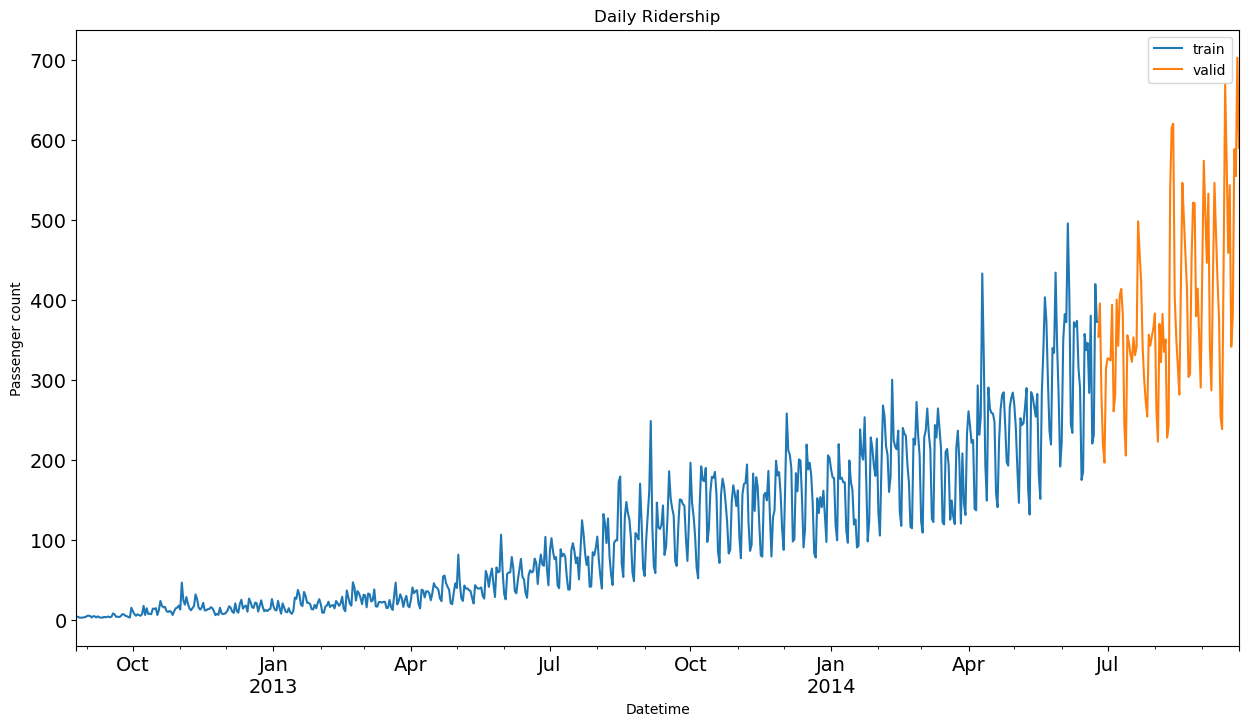

In [32]:
Train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train') 
valid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid') 
plt.xlabel("Datetime")
plt.ylabel("Passenger count") 
plt.legend(loc='best')
plt.show()

Here the blue part represents the train data and the orange part represents the validation data.

We will predict the traffic for the validation part and then visualize how accurate our predictions are. Finally, we will make predictions for the test dataset.

We will look at various models for Time Series Forecasting. Methods which we will be discussing for the forecasting are:

1. Naive Approach
2. Moving Average
3. Simple Exponential Smoothing
4. Holt’s Linear Trend Model

i) Naive Approach

In this forecasting technique, we assume that the next expected point is equal to the last observed point. So we can expect a straight horizontal line as the prediction. Let’s understand it with an example and an image:

Suppose we have passenger count for 5 days as shown below:

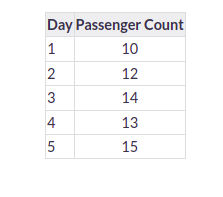

In [33]:
from IPython.display import Image
Image('t8.png')

And we have to predict the passenger count for the next 2 days. A naive approach will assign the 5th day’s passenger count to the 6th and 7th day, i.e., 15 will be assigned to the 6th and 7th day.

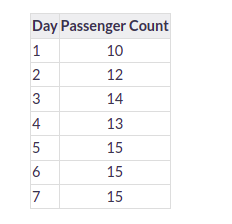

In [34]:
from IPython.display import Image
Image('t9.png')

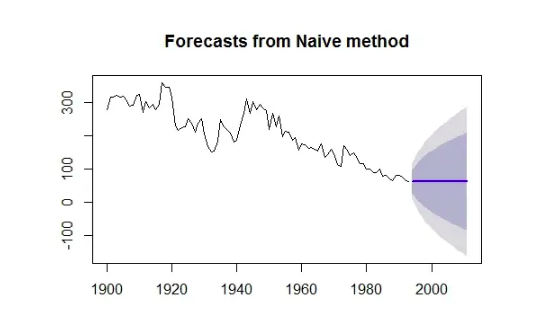

In [35]:
from IPython.display import Image
Image('t10.png')

The blue line is the prediction here. All the predictions are equal to the last observed point.

Let’s make predictions using the naive approach for the validation set.

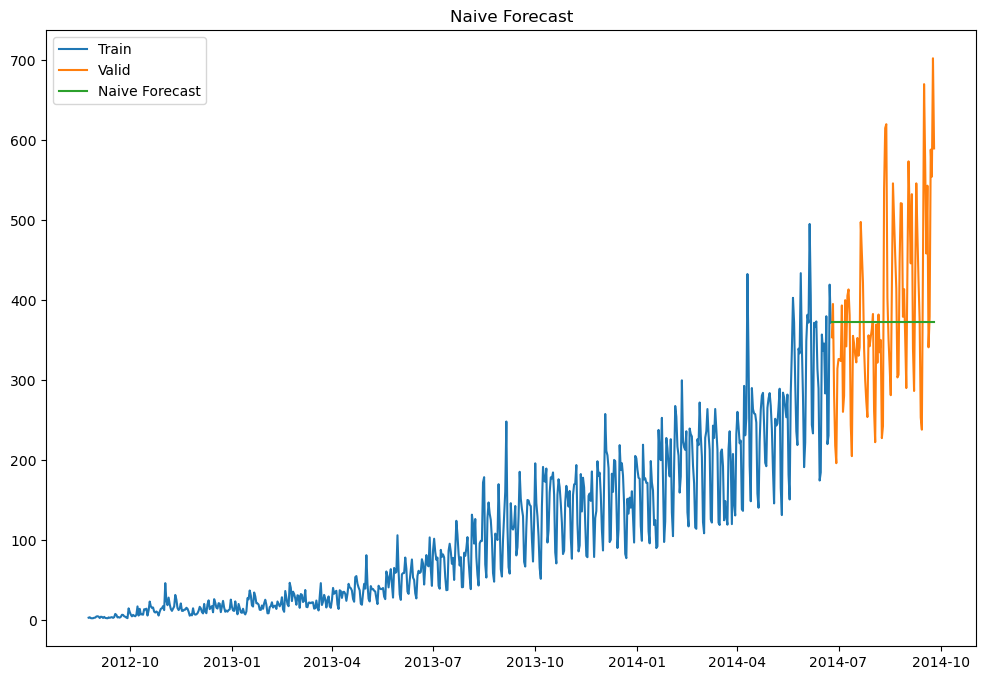

In [36]:
dd= np.asarray(Train.Count) 
y_hat = valid.copy() 
y_hat['naive'] = dd[len(dd)-1] 
plt.figure(figsize=(12,8)) 
plt.plot(Train.index, Train['Count'], label='Train') 
plt.plot(valid.index,valid['Count'], label='Valid') 
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast') 
plt.legend(loc='best') 
plt.title("Naive Forecast") 
plt.show()

We can calculate how accurate our predictions are using rmse(Root Mean Square Error).
rmse is the standard deviation of the residuals.
Residuals are a measure of how far from the regression line data points are.
The formula for rmse is:
                                        rmse=sqrt∑i=1N1N(p−a)2

We will now calculate RMSE to check the accuracy of our model on the validation data set.

In [37]:
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(valid.Count, y_hat.naive)) 
print(rms)

111.79050467496724


We can infer that this method is not suitable for datasets with high variability. We can reduce the rmse value by adopting different techniques.

2) Moving Average

In this technique, we will take the average of the passenger counts for the last few time periods only.

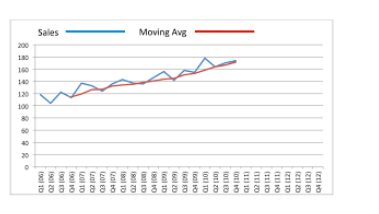

In [38]:
from IPython.display import Image
Image('t11.png')

Here the predictions are made on the basis of the average of the last few points instead of taking all the previously known values.

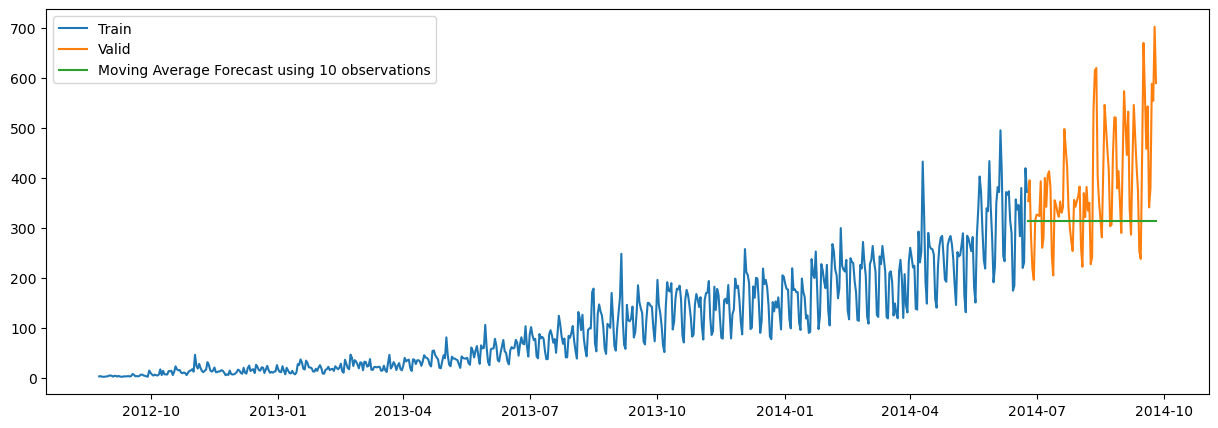

In [39]:
#Let’s try the rolling mean for the last 10, 20, and 50 days and visualize the results.
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(10).mean().iloc[-1] 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], 
                label='Moving Average Forecast using 10 observations')
plt.legend(loc='best') 
plt.show()

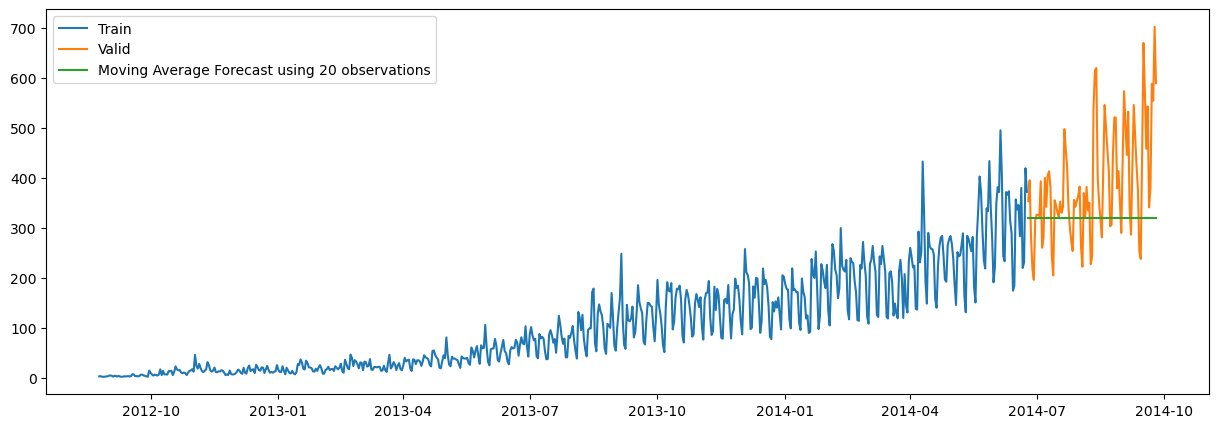

In [40]:
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(20).mean().iloc[-1] 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], 
                label='Moving Average Forecast using 20 observations') 
plt.legend(loc='best') 
plt.show()

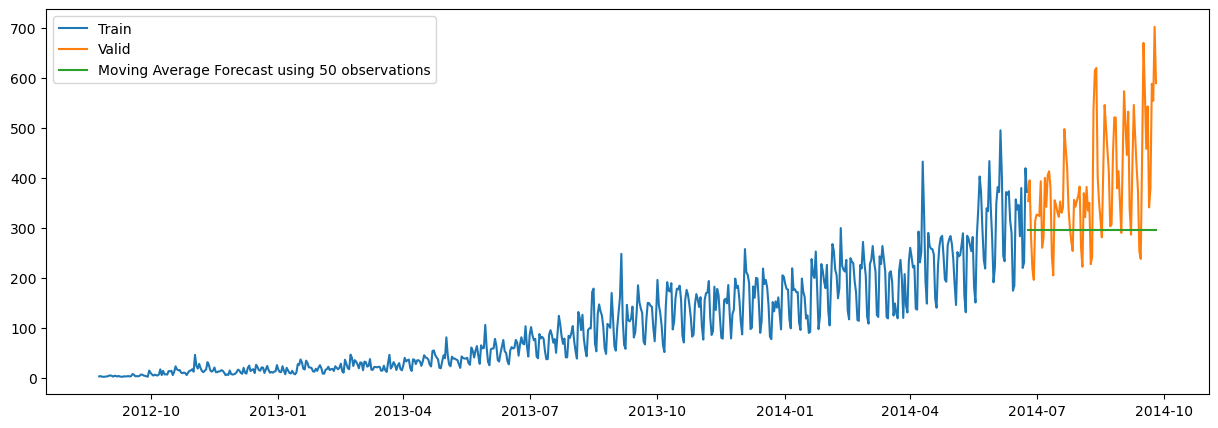

In [41]:
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(50).mean().iloc[-1] 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], 
                    label='Moving Average Forecast using 50 observations') 
plt.legend(loc='best') 
plt.show()

We took the average of the last 10, 20, and 50 observations and predicted based on that. This value can be changed in the above code in .rolling().mean() part. We can see that the predictions are getting weaker as we increase the number of observations.

In [42]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast)) 
print(rms)

144.19175679986793


3) Simple Exponential Smoothing

In this technique, we assign larger weights to more recent observations than to observations from the distant past.

The weights decrease exponentially as observations come from further in the past, the smallest weights are associated with the oldest observations.

NOTE:- – If we give the entire weight to the last observed value only, this method will be similar to the naive approach. So, we can say that the naive approach is also a simple exponential smoothing technique where the entire weight is given to the last observed value.

Here the predictions are made by assigning larger weight to the recent values and lesser weight to the old values.

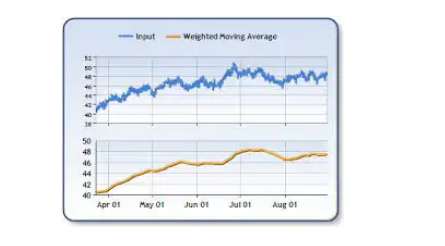

In [43]:
from IPython.display import Image
Image('t12.png')

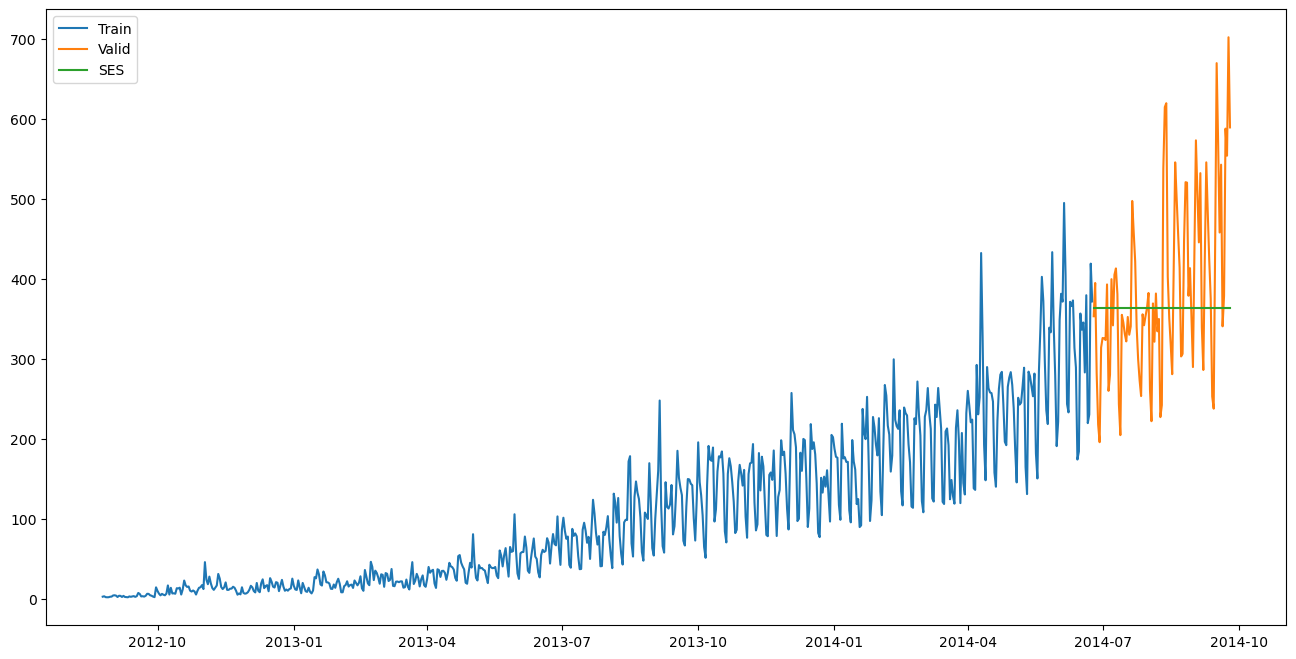

In [44]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt 
y_hat_avg = valid.copy() 
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6,
        optimized=False) 
y_hat_avg['SES'] = fit2.forecast(len(valid))
plt.figure(figsize=(16,8))  
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['SES'], label='SES') 
plt.legend(loc='best') 
plt.show()

In [45]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.SES)) 
print(rms)

113.43708111884514


We can infer that the fit of the model has improved as the rmse value has reduced.

4) Holt’s Linear Trend Model

It is an extension of simple exponential smoothing to allow forecasting of data with a trend.
This method takes into account the trend of the dataset. The forecast function in this method is a function of level and trend.
First of all let us visualize the trend, seasonality, and error in the series.

We can decompose the time series into four parts.

Observed, which is the original time series.

Trend, which shows the trend in the time series, i.e., increasing or decreasing behavior of the time series.

Seasonal, which tells us about the seasonality in the time series.

Residual, which is obtained by removing any trend or seasonality in the time series.

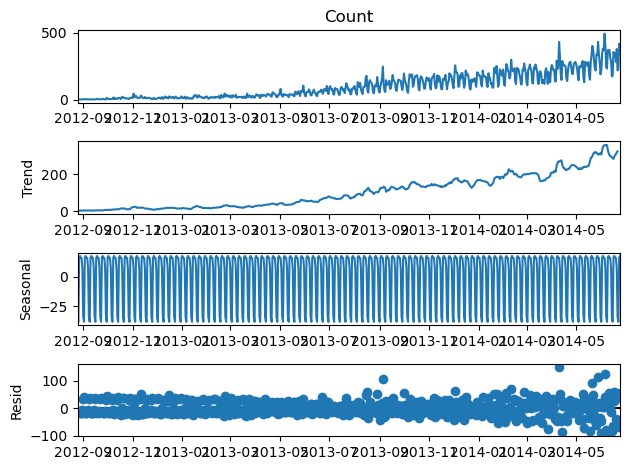

In [46]:
#Let’s visualize all these parts.

import statsmodels.api as sm 
sm.tsa.seasonal_decompose(Train.Count).plot() 
result = sm.tsa.stattools.adfuller(train.Count) 
plt.show()

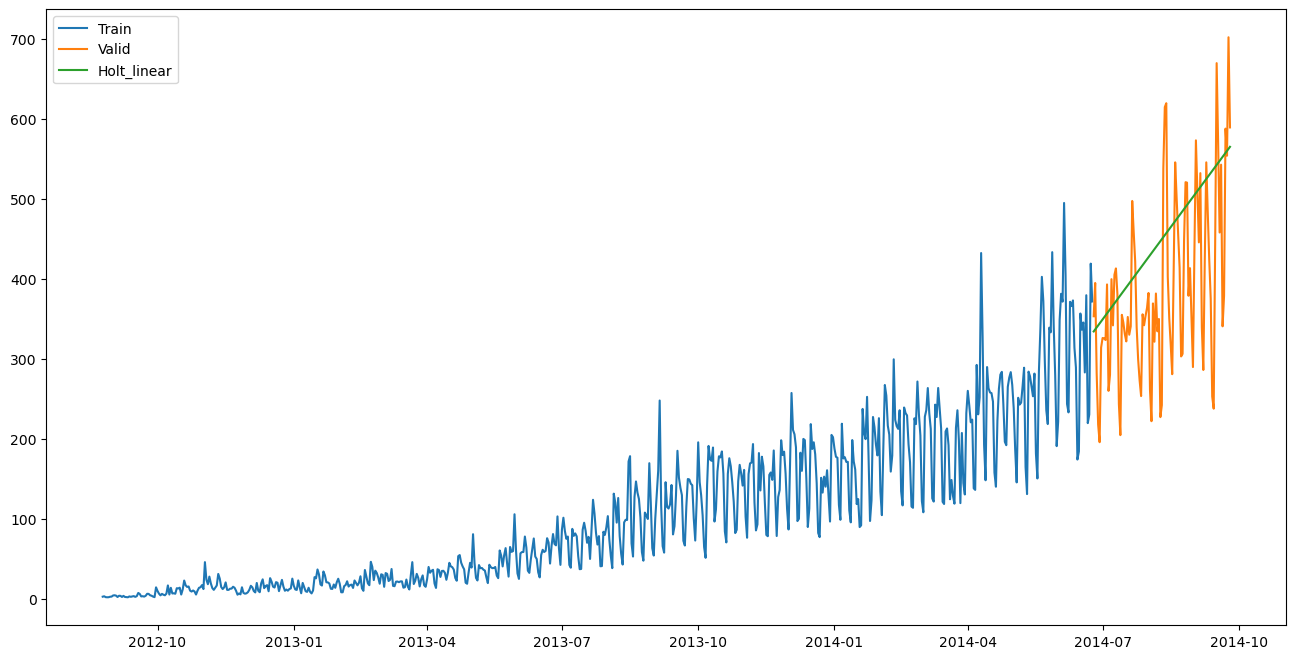

In [47]:
#An increasing trend can be seen in the dataset, so now we will make a model based on the trend.

y_hat_avg = valid.copy() 
fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level = 0.3,
        smoothing_slope = 0.1) 
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid)) 
plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear') 
plt.legend(loc='best') 
plt.show()

In [48]:
#We can see an inclined line here as the model has taken into consideration the trend of the time series.

#Let’s calculate the rmse of the model.

rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_linear)) 
print(rms)

112.94278345314041


In [49]:
predict = fit1.forecast(len(test))
test['predict'] = predict
test.head()

ID    year  month   day  Hour     predict
Datetime                                                  
2014-09-26  18299.5  2014.0    9.0  26.0  11.5  334.650767
2014-09-27  18323.5  2014.0    9.0  27.0  11.5  337.159011
2014-09-28  18347.5  2014.0    9.0  28.0  11.5  339.667256
2014-09-29  18371.5  2014.0    9.0  29.0  11.5  342.175500
2014-09-30  18395.5  2014.0    9.0  30.0  11.5  344.683745

5) Holt Winter's model on daily time series - For datasets which show a similar set of patterns after fixed intervals of time or seasonality which the earlier models didn't take into account. Holt Winter's method applies seasonality in addition to level and trend.

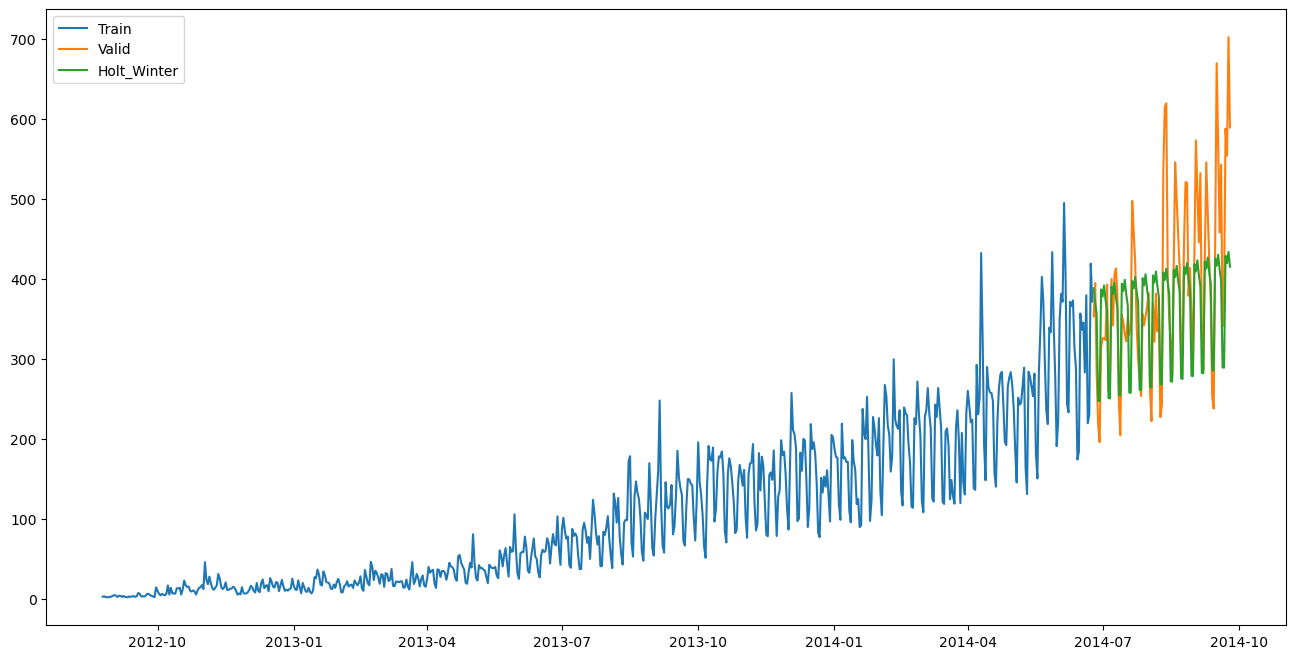

RMSE =  81.94800188083322


In [50]:
y_hat_avg = valid.copy()
fit1= ExponentialSmoothing(np.asarray(Train['Count']), seasonal_periods=7, trend='add', seasonal='add').fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid))
plt.figure(figsize = (16,8))
plt.plot(Train['Count'], label= 'Train' )
plt.plot(valid['Count'], label = 'Valid')
plt.plot(y_hat_avg['Holt_Winter'], label = 'Holt_Winter')
plt.legend()
plt.show()
print('RMSE = ', sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_Winter)))

We see that the rmse value has reduced a lot from this method. Let's forecast the Counts for the test dataset

In [51]:
predict = fit1.forecast(len(test))
test['predict'] = predict
test.head()

ID    year  month   day  Hour     predict
Datetime                                                  
2014-09-26  18299.5  2014.0    9.0  26.0  11.5  388.681720
2014-09-27  18323.5  2014.0    9.0  27.0  11.5  370.220765
2014-09-28  18347.5  2014.0    9.0  28.0  11.5  356.592100
2014-09-29  18371.5  2014.0    9.0  29.0  11.5  247.877627
2014-09-30  18395.5  2014.0    9.0  30.0  11.5  247.428796

But these predictions are daily predcitions. To convert these to hourly basis we need to calculate the ratio of passenger count fro each hour of the day. We calculate the ratio for each hour in our original train dataset and multiply it to the daily predcitioins to find the hourly predictions.

In [52]:
#calculating the hourly ratio of the count
train_original['ratio'] = train_original['Count']/train_original['Count'].sum()

#Grouping the houry ratio
temp = train_original.groupby(['Hour'])['ratio'].sum()

# To change temp to csv format
pd.DataFrame(temp, columns= ['Hour', 'ratio']).to_csv('GROUPby.csv')
temp2  = pd.read_csv('GROUPby.csv')
temp2.head()

temp2 = temp2.drop('Hour.1',1)
temp2.head()

Hour     ratio
0     0  0.044287
1     1  0.035343
2     2  0.029911
3     3  0.024714
4     4  0.020802

In [53]:
#Merging Test and test_original on day , month and year
merge = pd.merge(test, test_original, on = ('day', 'month', 'year'), how = 'left')
merge['Hour'] = merge ['Hour_y']
merge = merge.drop(['year', 'month', 'Datetime','Hour_x', 'Hour_y'], axis = 1)

# Predicting by merging merge and temp2
prediction=pd.merge(merge, temp2, on='Hour', how='left')

# Converting Ratio to original Scale
prediction['Count'] = prediction['predict']*prediction['ratio']*24
prediction['ID'] = prediction['ID_y']
prediction = prediction.drop(['ID_x', 'ID_y', 'day', 'predict', 'Hour', 'ratio'], 1)
test.shape

(213, 6)

Holt's Linear model took care of the trend while the Holt's Winter model took care of seasonality. Now we come to ARIMA, which takes care of both seasonality and trend.


6) ARIMA
ARIMA Stands for Auto Regression Integrated Moving Average and it is specified by 3 Ordered Parameters (p,d,q).
p is the order of the autoregressive model(number of time lags)

d is the degree of differencing(number of times the data have had past values subtracted)

q is the order of moving average model. We will discuss more about these parameters in next section.

For ARIMA model, the time series should be stationary that is, the mean , variance and covariance must be independent of time.

We use dickey fullar test to check for stationarity and if the Test statistic is less than the critical value we reject the null hypothesis that the time series is not stationary.

Now that we have made the Time series stationary, let’s make models on the time series using differencing because it is easy to add the error , trend and seasonality back into predicted values.

We will use statistical modelling method called ARIMA to forecast the data.

ARIMA stands for Autoregressive Integrated Moving Average models. Univariate (single vector) ARIMA is a forecasting technique that projects the future values of a series based entirely on its own inertia. Its main application is in the area of short term forecasting requiring at least 40 historical data points. It works best when your data exhibits a stable or consistent pattern over time with a minimum amount of outliers. Sometimes called Box-Jenkins (after the original authors), ARIMA is usually superior to exponential smoothing techniques when the data is reasonably long and the correlation between past observations is stable. If the data is short or highly volatile, then some smoothing method may perform better. If you do not have at least 38 data points, you should consider some other method than ARIMA.

Basic Concepts:

The first step in applying ARIMA methodology is to check for stationarity. "Stationarity" implies that the series remains at a fairly constant level over time. If a trend exists, as in most economic or business applications, then your data is NOT stationary. The data should also show a constant variance in its fluctuations over time. This is easily seen with a series that is heavily seasonal and growing at a faster rate. In such a case, the ups and downs in the seasonality will become more dramatic over time. Without these stationarity conditions being met, many of the calculations associated with the process cannot be computed. (we did "Stationarity" in NB 9_B and 9_C )

Differencing:

If a graphical plot of the data indicates nonstationarity, then you should "difference" the series. Differencing is an excellent way of transforming a nonstationary series to a stationary one. This is done by subtracting the observation in the current period from the previous one. If this transformation is done only once to a series, you say that the data has been "first differenced"( means d=1 ). This process essentially eliminates the trend if your series is growing at a fairly constant rate. If it is growing at an increasing rate, you can apply the same procedure and difference the data again. Your data would then be "second differenced"( means d=2 ).

Autocorrelations

"Autocorrelations" are numerical values that indicate how a data series is related to itself over time. More precisely, it measures how strongly data values at a specified number of periods apart are correlated to each other over time. The number of periods apart is usually called the "lag". For example, an autocorrelation at lag 1 measures how values 1 period apart are correlated to one another throughout the series. An autocorrelation at lag 2 measures how the data two periods apart are correlated throughout the series. Autocorrelations may range from +1 to -1. A value close to +1 indicates a high positive correlation while a value close to -1 implies a high negative correlation.

Autoregressive Models:

ARIMA methodology attempts to describe the movements in a stationary time series as a function of what are called "autoregressive and moving average" parameters. These are referred to as AR parameters (autoregessive) and MA parameters (moving averages). An AR model with only 1 parameter may be written as...

X(t) = A(1) * X(t-1) + E(t)

where X(t) = time series under investigation

A(1) = the autoregressive parameter of order 1

X(t-1) = the time series lagged 1 period

E(t) = the error term of the model

This simply means that any given value X(t) can be explained by some function of its previous value, X(t-1), plus some unexplainable random error, E(t). If the estimated value of A(1) was .30, then the current value of the series would be related to 30% of its value 1 period ago. Of course, the series could be related to more than just one past value. For example,

X(t) = A(1) * X(t-1) + A(2) * X(t-2) + E(t)

This indicates that the current value of the series is a combination of the two immediately preceding values, X(t-1) and X(t-2), plus some random error E(t). Our model is now an autoregressive model of order 2.

Moving Average Models:

A second type of Box-Jenkins model is called a "moving average" model. Although these models look very similar to the AR model, the concept behind them is quite different. Moving average parameters relate what happens in period t only to the random errors that occurred in past time periods, i.e. E(t-1), E(t-2), etc. rather than to X(t-1), X(t-2), (Xt-3) as in the autoregressive approaches. A moving average model with one MA term may be written as follows...

X(t) = -B(1) * E(t-1) + E(t)

The term B(1) is called an MA of order 1. The negative sign in front of the parameter is used for convention only and is usually printed out auto- matically by most computer programs. The above model simply says that any given value of X(t) is directly related only to the random error in the previous period, E(t-1), and to the current error term, E(t). As in the case of autoregressive models, the moving average models can be extended to higher order structures covering different combinations and moving average lengths.

Mixed Models:

ARIMA methodology also allows models to be built that incorporate both autoregressive and moving average parameters together. These models are often referred to as "mixed models". Although this makes for a more complicated forecasting tool, the structure may indeed simulate the series better and produce a more accurate forecast. Pure models imply that the structure consists only of AR or MA parameters - not both.

The models developed by this approach are usually called ARIMA models because they use a combination of autoregressive (AR), integration (I) - referring to the reverse process of differencing to produce the forecast, and moving average (MA) operations. An ARIMA model is usually stated as ARIMA(p,d,q). This represents the order of the autoregressive components (p), the number of differencing operators (d), and the highest order of the moving average term(q). For example, ARIMA(2,1,1) means that you have a second order autoregressive model with a first order moving average component whose series has been differenced once to induce stationarity.

Important : Parameters (p,d,q) of the ARIMA model.

Let me explain these dependent parameters:

• p : This is the number of AR (Auto-Regressive) terms or The number of lag observations included in the model, also called the lag order.

Example — if p is 3 the predictor for y(t) will be y(t-1),y(t-2),y(t-3).

• d :This is the number of differences or the number of non-seasonal differences.

Example - d=0: no differencing (no trends)

d=1: perform differencing once (linear trend)

d=2: double differencing

• q : The size of the moving average window. q is the number of lagged forecast errors in the prediction equation (MA part). This allows us to set the error of our model as a linear combination of the error values observed at previous time points in the past.

Example - an MA of order 1 means that X(t) is directly related only to the random error in the previous period, E(t-1), and to the current error term, E(t).


The ARIMA(p,d,q) model requires three parameters and is traditionally configured manually. (Therefore using ARIMA is more of an art than Science)

Analysis of the time series data assumes that we are working with a stationary time series.

The time series is likely non-stationary. We can make it stationary by first differencing the series and using a statistical test to confirm that the result is stationary.

The next first step is to select the lag values for the Autoregression (AR) and Moving Average (MA) parameters, p and q respectively.

We can do this by reviewing Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots.

Note : In the field of time series analysis, autocorrelation refers to the correlation of a time series with a lagged version of itself. For example, an autocorrelation of order 3 returns the correlation between a time series and its own values lagged by 3 time points.

It is common to use the autocorrelation (ACF) plot, also known as self-autocorrelation, to visualize the autocorrelation of a time-series. The plot_acf() function in the statsmodels library can be used to measure and plot the autocorrelation of a time series.

Now let’s check out on how we can figure out what value of p and q to use. We have used two popular plotting techniques above; they are:

• Autocorrelation Function (ACF): It just measures the correlation between two consecutive (lagged version). example at lag 4, ACF will compare series at time instance t1…t2 with series at instance t1–4…t2–4

• Partial Autocorrelation Function (PACF): is used to measure the degree of association between y(t) and y(t-p).

• p: The point where the PACF crosses the upper confidence interval and is the highest, here its 0 ( look at x = 0 ). hence p = 0. This means at lag = 0, we get the highest correlation.

• q: The point where the ACF crosses the upper confidence interval and is the highest. Here its close to 0. hence q = 0.

This quick analysis suggests an ARIMA(0,1,0) on the raw data may be a good starting point

In [55]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):        #Function to calculate the results of the Dickey-Fuller test.
    
    #Determining rolling Statistics for 24 hours on each day
    rolmean = pd.Series(timeseries).rolling(window=24).mean()   
    rolstd = pd.Series(timeseries).rolling(window=244).std()
    
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
    plt.legend()
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block= False)
    
    # Dickey-Fuller Test
    print('Results of Dickey-Fuller test:')
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)

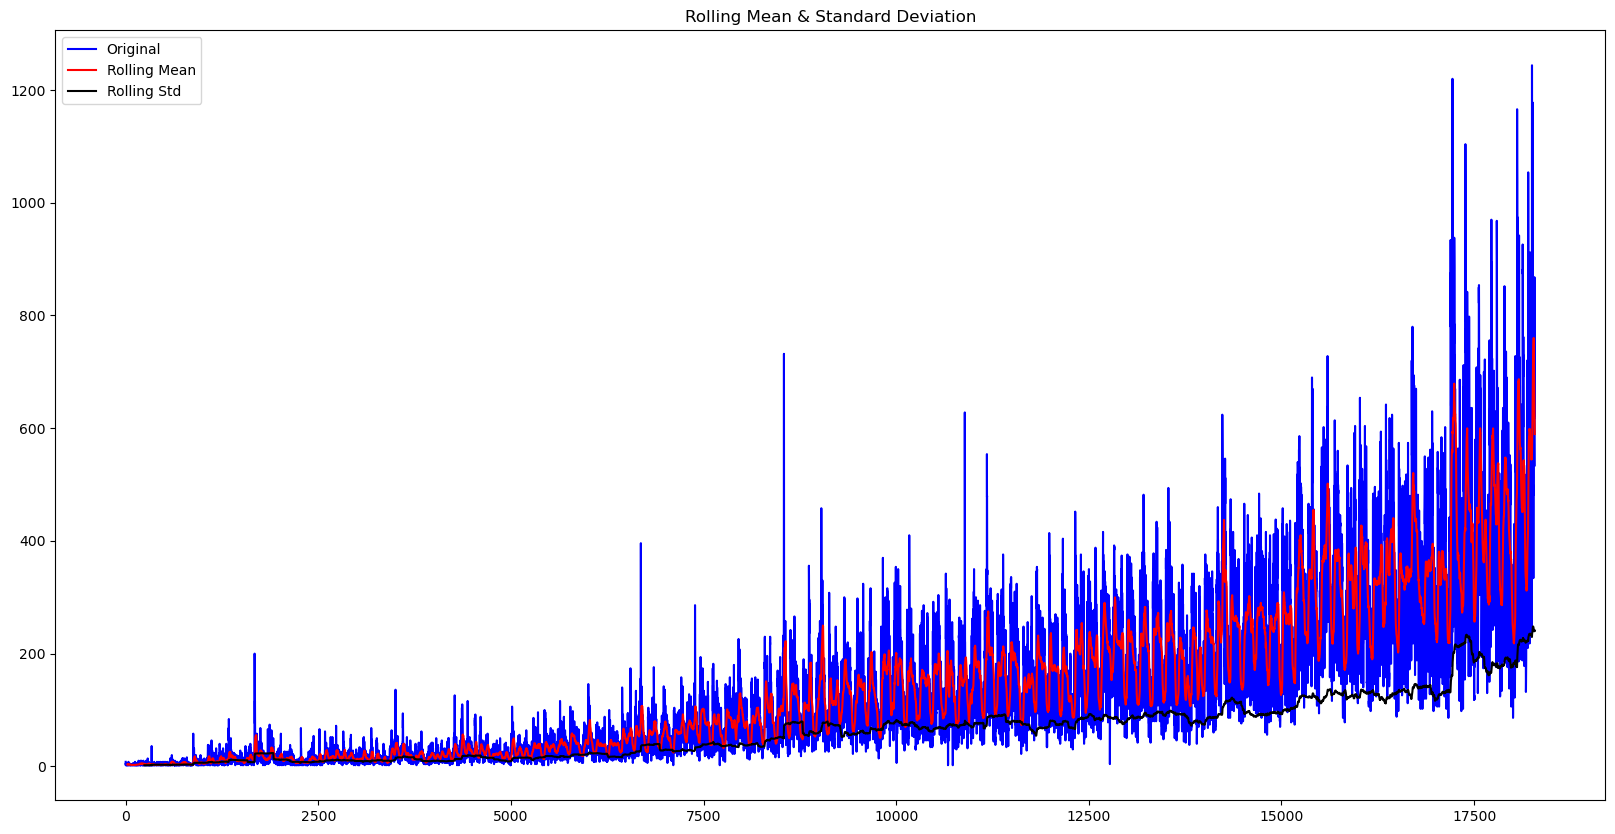

Results of Dickey-Fuller test:
Test Statistic                    -4.456561
p-value                            0.000235
#Lags Used                        45.000000
Number of Observations Used    18242.000000
Critical Value (1%)               -3.430709
Critical Value (5%)               -2.861698
Critical Value (10%)              -2.566854
dtype: float64


In [56]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

test_stationarity(train_original['Count'])

The results show that the time series is stationary as Test statistic is less than the critical values. However, we see that there is an increasing trend in the data. So, firstly we will try to make data more stationary by removing the trend.
We see aa increasing trend in the data so we can apply transformation that penalizes higher values more than the smaller ones.

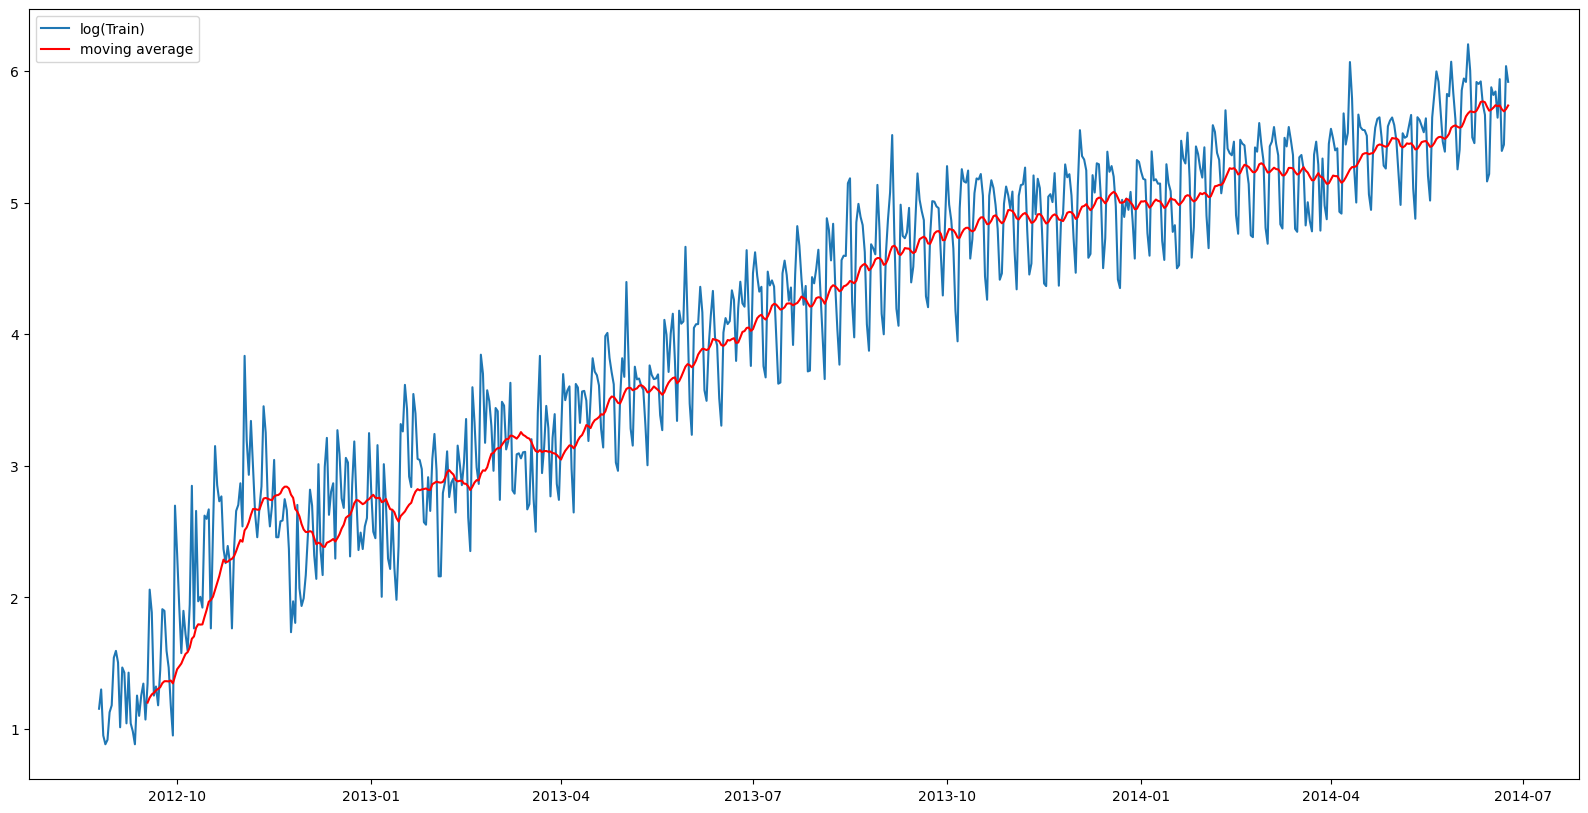

In [57]:
Train_log = np.log(Train['Count'])
valid_log = np.log(valid['Count'])

moving_avg = Train_log.rolling(24).mean()
plt.plot(Train_log, label = 'log(Train)')
plt.plot(moving_avg, color = 'Red', label = 'moving average')
plt.legend()
plt.show()

The trend is clearly visible from the red line of the moving average. We remove it by subtracting is from the Train_log

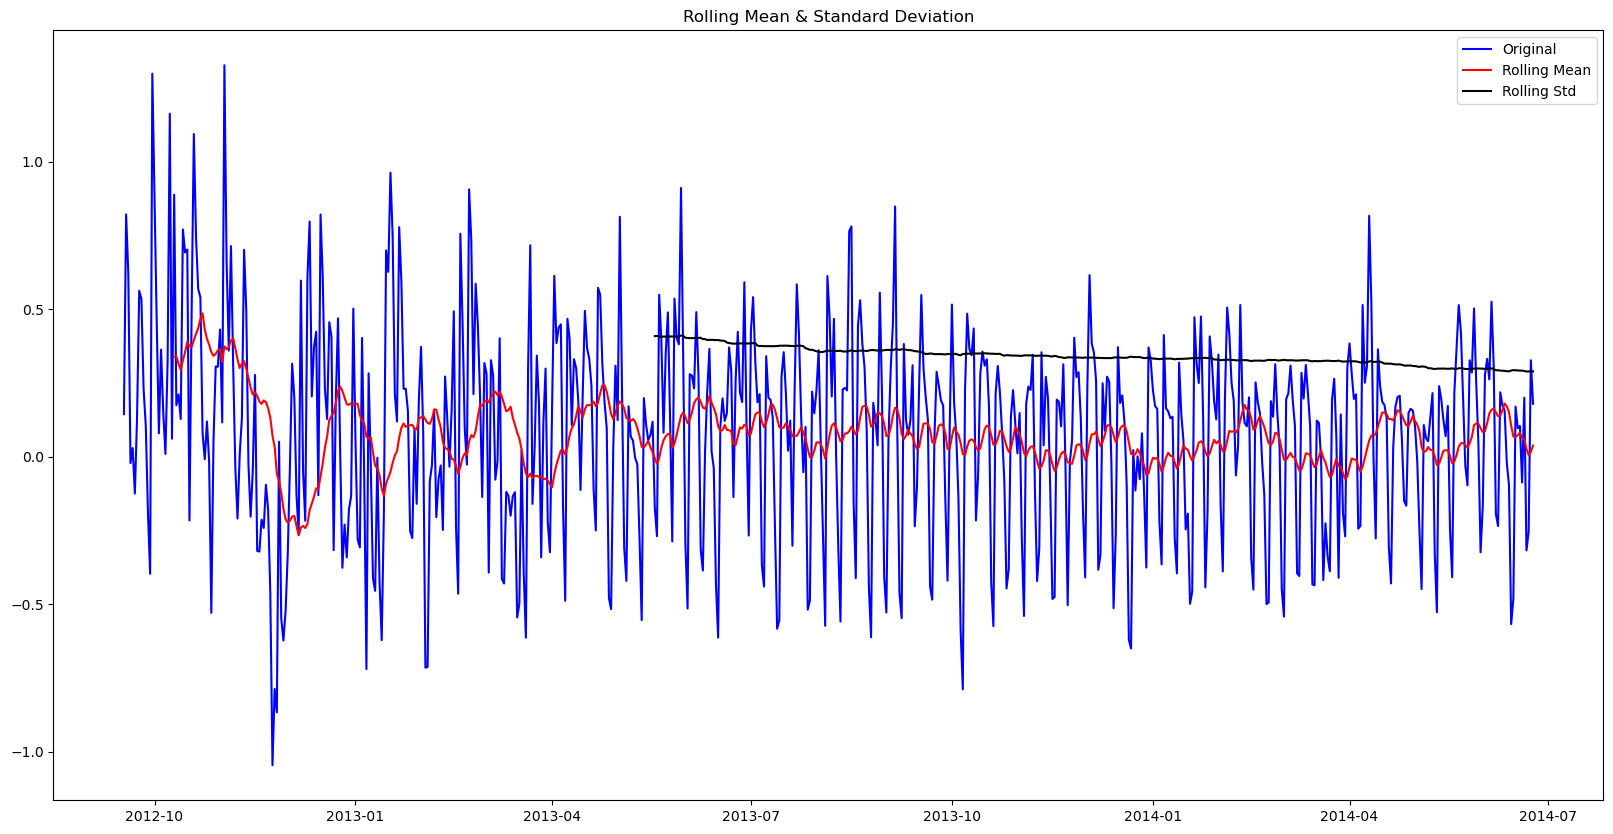

Results of Dickey-Fuller test:
Test Statistic                -5.861646e+00
p-value                        3.399422e-07
#Lags Used                     2.000000e+01
Number of Observations Used    6.250000e+02
Critical Value (1%)           -3.440856e+00
Critical Value (5%)           -2.866175e+00
Critical Value (10%)          -2.569239e+00
dtype: float64


In [58]:
train_log_moving_avg_diff = Train_log - moving_avg

train_log_moving_avg_diff.dropna(inplace = True)    # Dropping Null Values 

test_stationarity(train_log_moving_avg_diff)

The test statistic is now even smaller as the trend has been removed. We now statbilize the mean as is should not be a function of time.

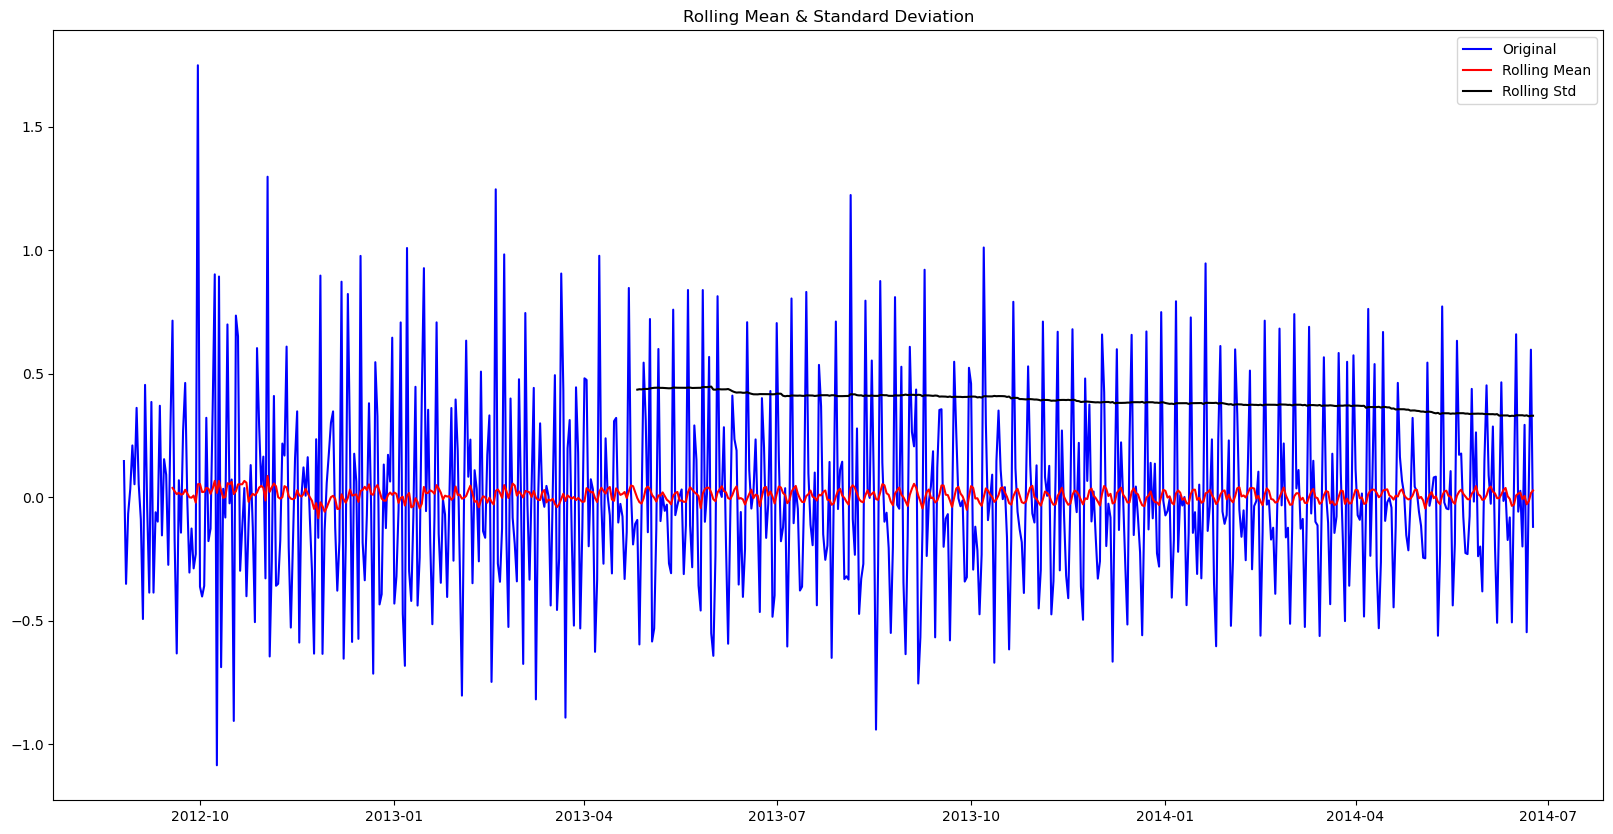

Results of Dickey-Fuller test:
Test Statistic                -8.237568e+00
p-value                        5.834049e-13
#Lags Used                     1.900000e+01
Number of Observations Used    6.480000e+02
Critical Value (1%)           -3.440482e+00
Critical Value (5%)           -2.866011e+00
Critical Value (10%)          -2.569151e+00
dtype: float64


In [59]:
train_log_diff = Train_log  - Train_log.shift(1)
test_stationarity(train_log_diff.dropna())

Now we will decompose the time series into trend and seasonality and will get the residual which is the random variation in the series.

Removing Seasonality

Seasonality means periodic fluctuctions of a fixed and known period. We use seasonal_decompose to decompose time series into trend, seasonality and residuals.

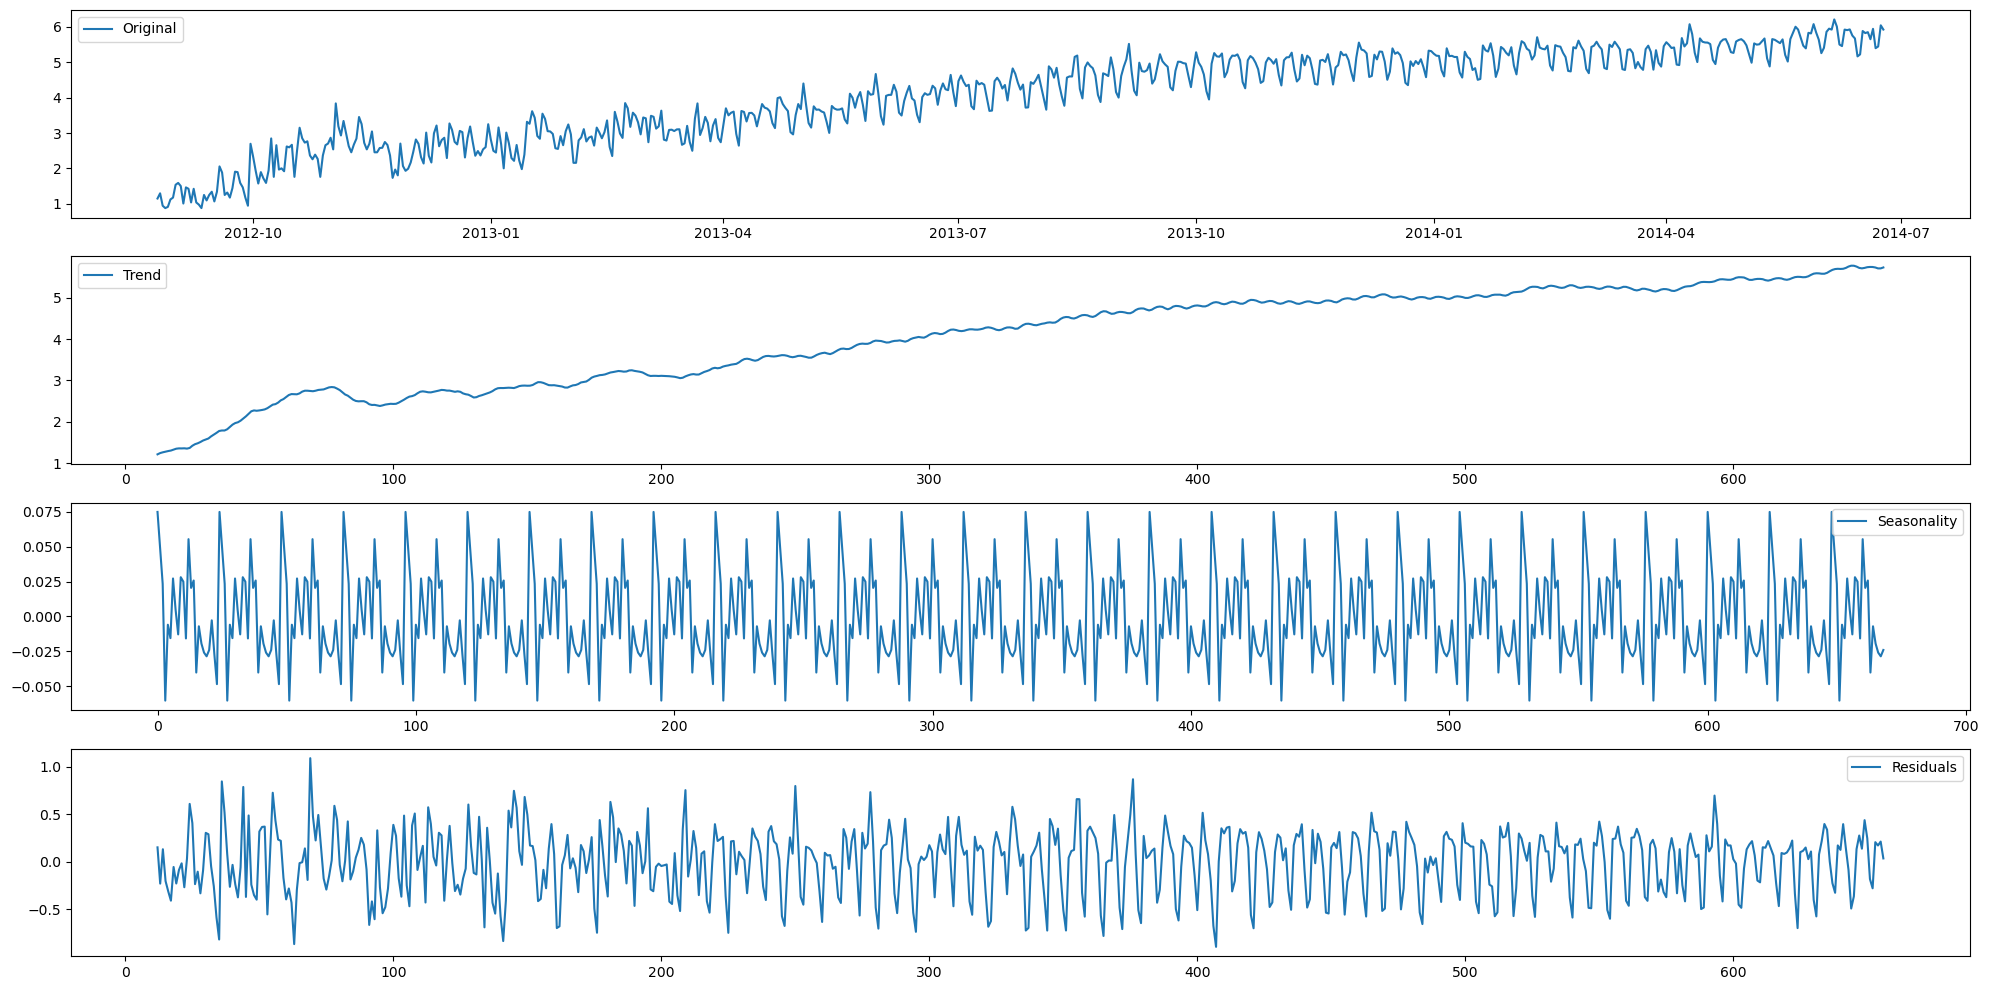

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(pd.DataFrame(Train_log).Count.values, period= 24)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(Train_log, label = 'Original')
plt.legend()
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

We find the values of p,d,q parameters required for applying ARIMA algortihm. To find the optimized values of these parameters we use ACF and PACF.
ACF is a measure of the correlation between the TimeSeries with a lagged version of itself.
PACF measures the correlation between the TimeSeries with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons.

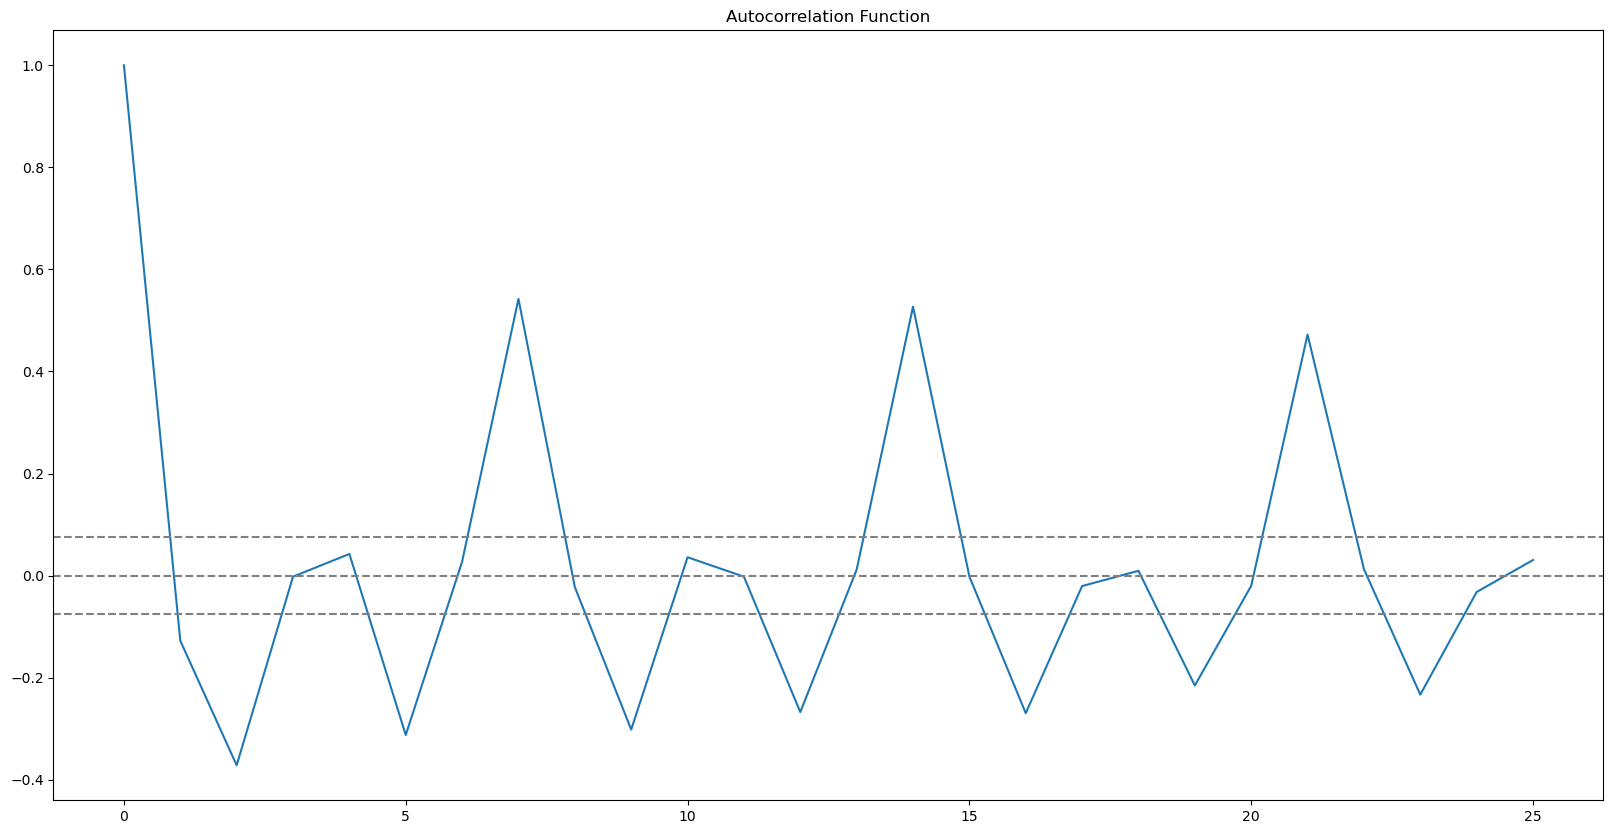

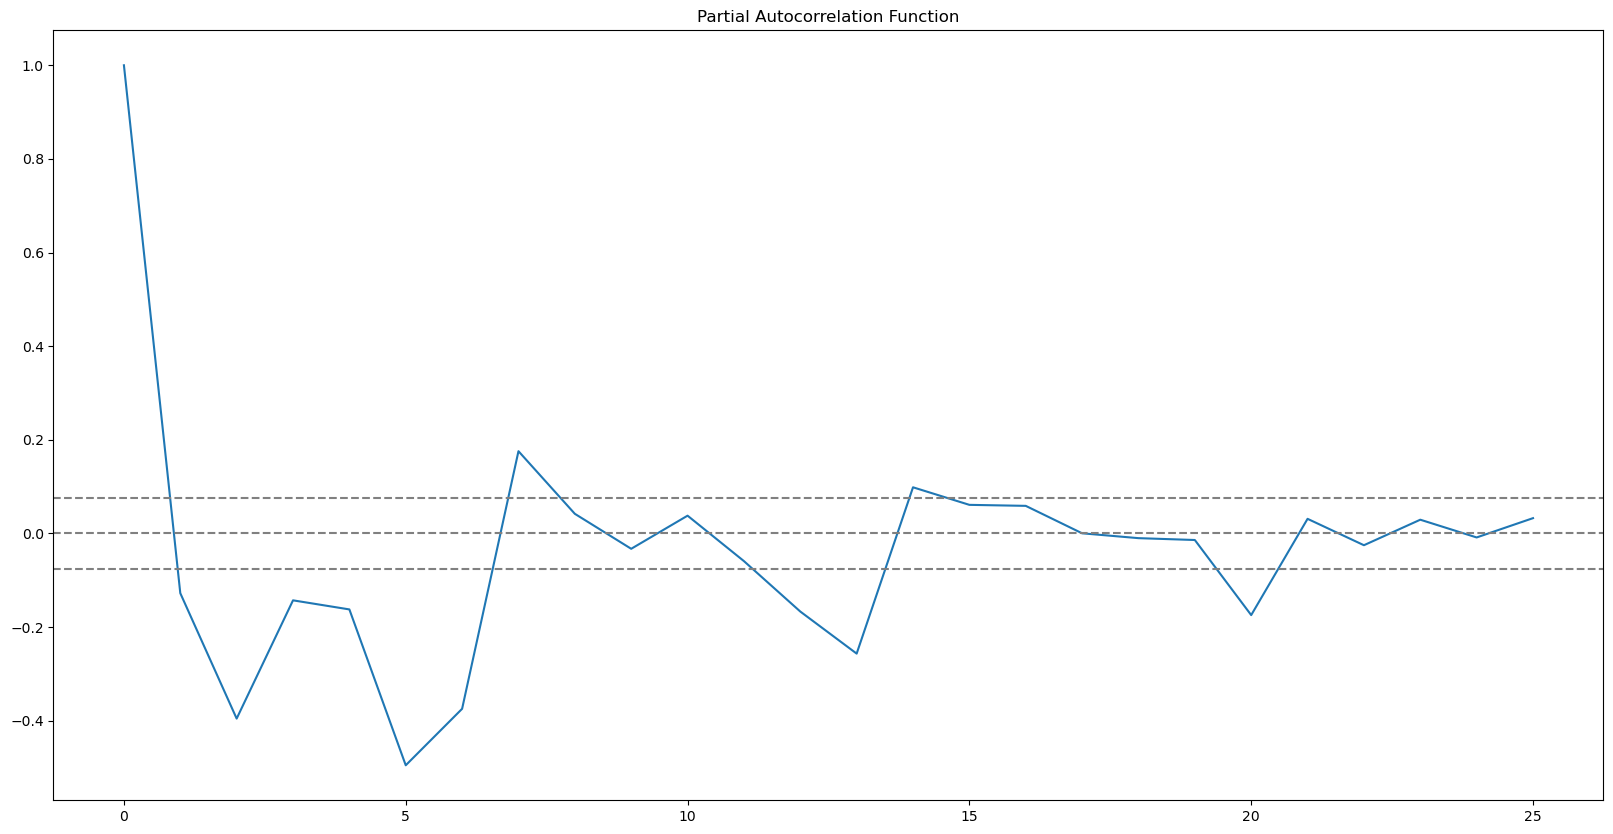

In [61]:
from statsmodels.tsa.stattools import acf,pacf
lag_acf = acf(train_log_diff.dropna(), nlags= 25)
lag_pacf = pacf(train_log_diff.dropna(), nlags = 25, method = 'ols')

plt.plot(lag_acf)
plt.axhline(y = 0, linestyle ='--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()

p value is the lag value where the PACF chart crosses the upper confidence interval for the first time . Here p = 1.
q value is the lag value where the ACF chart crosses the upper confidence interval for the first time. Here q = 1

In [79]:
!pip install statsmodels==0.12.2 --user

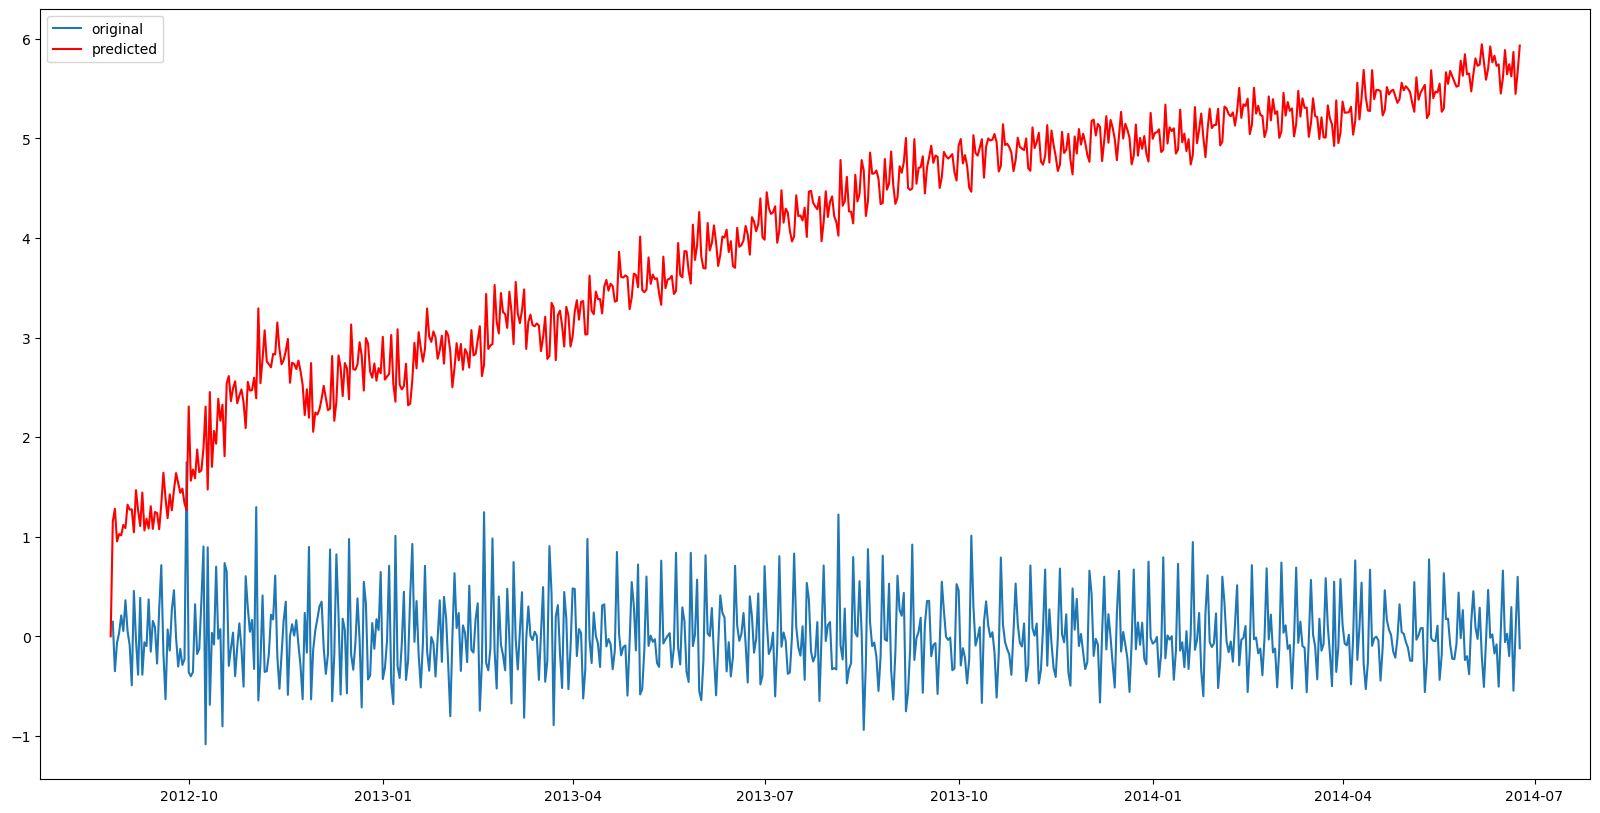

In [88]:
#ARIMA model 
from statsmodels.tsa.arima.model import ARIMA
import warnings

warnings.filterwarnings("ignore")

model = ARIMA(Train_log, order=(2, 1, 2))  
results_ARIMA = model.fit()  
plt.plot(train_log_diff.dropna(),  label='original')
plt.plot(results_ARIMA.fittedvalues, color='red', label='predicted')
plt.legend(loc='best')
plt.show()

In [89]:
# function to change the scale of the model to the current scale
def check_prediction_diff(predict_diff, given_set):
    predict_diff= predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['Count'])[0], index = given_set.index)
    predict_log = predict_base.add(predict_diff,fill_value=0)
    predict = np.exp(predict_log)
    
    
    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()

In [90]:
def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log)
    
    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()

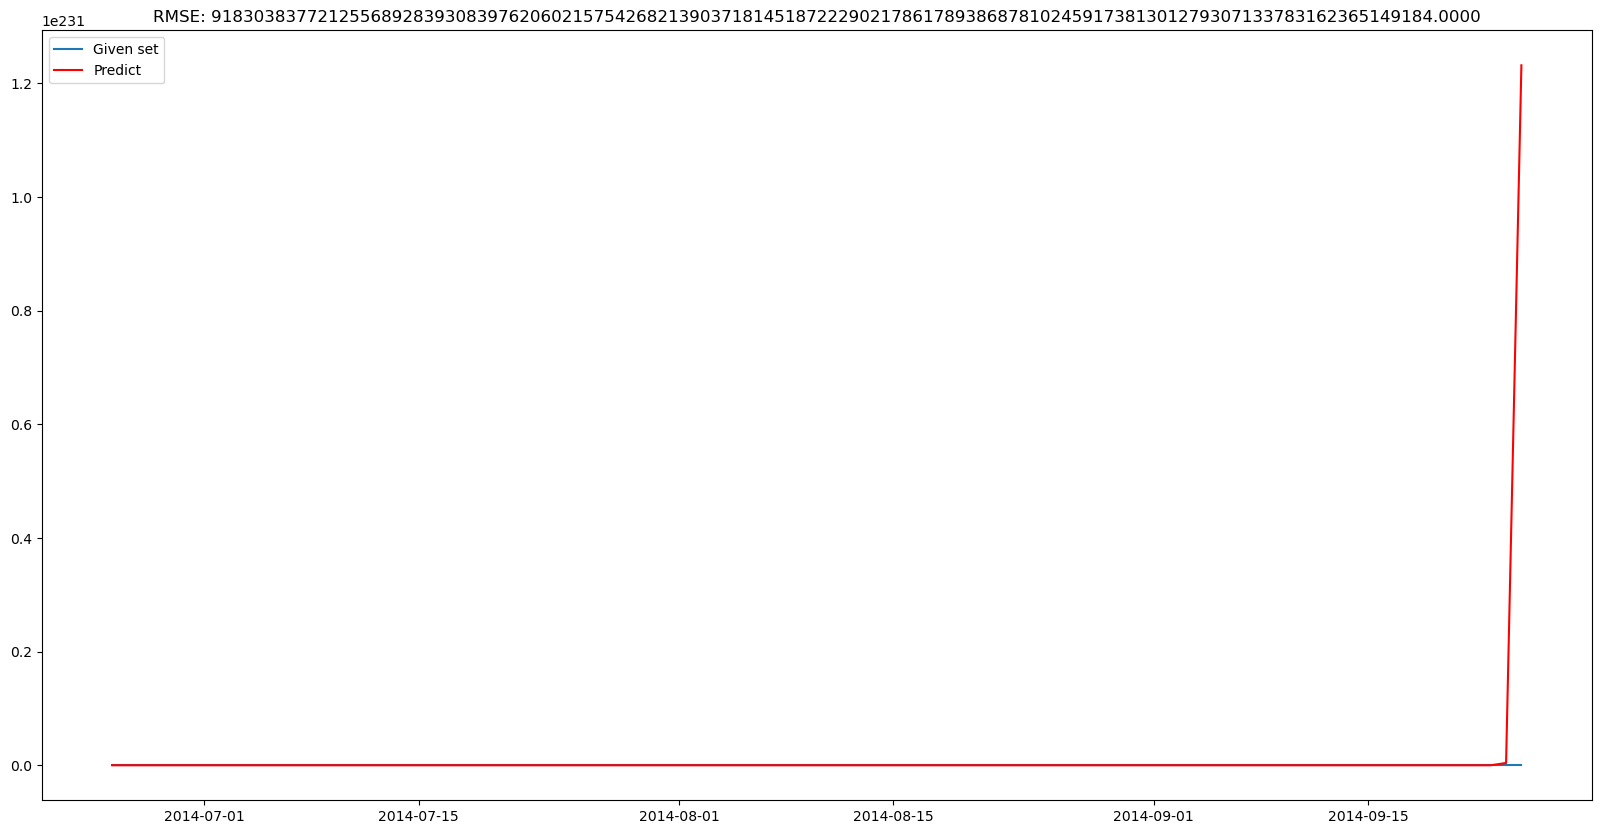

In [91]:
ARIMA_predict_diff=results_ARIMA.predict(start="2014-06-25", end="2014-09-25")
check_prediction_diff(ARIMA_predict_diff, valid)